In [1]:
# Setup
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from joblib import dump, load
import os

In [2]:
# model file names
DTM_MODEL_1KM = 'dtm_model_1km'
LR_MODEL_1KM = 'lr_model_1km'
KNR_MODEL_1KM = 'knr_model_1km'
DTM_MODEL_5KM = 'dtm_model_5km'
LR_MODEL_5KM = 'lr_model_5km'
KNR_MODEL_5KM = 'knr_model_5km'
DTM_MODEL_10KM = 'dtm_model_10km'
LR_MODEL_10KM = 'lr_model_10km'
KNR_MODEL_10KM = 'knr_model_10km'
DTM_MODEL_21KM = 'dtm_model_21km'
LR_MODEL_21KM = 'lr_model_21km'
KNR_MODEL_21KM = 'knr_model_21km'
DTM_MODEL_42KM = 'dtm_model_42km'
LR_MODEL_42KM = 'lr_model_42km'
KNR_MODEL_42KM = 'knr_model_42km'

# time columns constants
COLUMN_TIME_1KM_ID = 'time_1km_id'
COLUMN_TIME_5KM_ID = 'time_5km_id'
COLUMN_TIME_10KM_ID = 'time_10km_id'
COLUMN_TIME_21KM_ID = 'time_21km_id'
COLUMN_TIME_42KM_ID = 'time_42km_id'

In [3]:
# Utilities methods

# Cosmetic function to print break line
def break_line():
  print('-------------------------------------------------------------------------------')

# Cosmetic function to print empty line
def break_empty():
  print()

In [4]:
from numpy.lib import shape_base
# Read csv file with responses
df = pd.read_csv('Mapped - Ankieta dla biegaczy.csv')

# Drop additionally added column and id column
df = df.drop(columns=['Unnamed: 0', 'id'])

# Show the shape of dataframe (rows, columns)
print('Form answer dataframe shape')
break_line()
print(df.shape)

Form answer dataframe shape
-------------------------------------------------------------------------------
(2192, 31)


In [5]:
print('Form answer dataframe columns')
break_line()
for column in df.columns:
    print(column)

Form answer dataframe columns
-------------------------------------------------------------------------------
year_of_birth
height
weight
running_years
time_1km_id
time_5km_id
time_10km_id
time_21km_id
time_42km_id
training_amount
km_amount
speed_training_amount
minute_per_km_speed_training_id
threshold_training_amount
minute_per_km_threshold_training_id
interval_training_amount
minute_per_km_interval_training_id
run_up_training_amount
minute_per_km_run_up_training_id
runway_amount
km_per_runway
minute_per_km_runway_id
other_trainings
other_trainings_amount
other_trainings_time
wellness
wellness_amount
detraining_amount
detraining_days
warmup_id
warmup_time


In [6]:
# Split df to distance specific dfs
def prepare_distance_dfs(df):
    # df for time 1km
    df_time_1km = df.loc[df['time_1km_id'] != 11]
    df_time_1km = df_time_1km.drop(columns=['time_5km_id', 'time_10km_id', 'time_21km_id', 'time_42km_id'])
    print('df_time_1km')
    break_line()
    print(df_time_1km)
    break_empty()


    # df for time 5km
    df_time_5km = df.loc[df['time_5km_id'] != 14]
    df_time_5km = df_time_5km.drop(columns=['time_1km_id', 'time_10km_id', 'time_21km_id', 'time_42km_id'])
    print('df_time_5km')
    break_line()
    print(df_time_5km)
    break_empty()

    # df for time 10km
    df_time_10km = df.loc[df['time_10km_id'] != 12]
    df_time_10km = df_time_10km.drop(columns=['time_1km_id', 'time_5km_id', 'time_21km_id', 'time_42km_id'])
    print('df_time_10km')
    break_line()
    print(df_time_10km)
    break_empty()

    # df for time 21km
    df_time_21km = df.loc[df['time_21km_id'] != 12]
    df_time_21km = df_time_21km.drop(columns=['time_1km_id', 'time_5km_id', 'time_10km_id', 'time_42km_id'])
    print('df_time_21km')
    break_line()
    print(df_time_21km)
    break_empty()

    # df for time 42km
    df_time_42km = df.loc[df['time_42km_id'] != 14]
    df_time_42km = df_time_42km.drop(columns=['time_1km_id', 'time_5km_id', 'time_10km_id', 'time_21km_id'])
    print('df_time_42km')
    break_line()
    print(df_time_42km)
    break_empty()
    
    return df_time_1km, df_time_5km, df_time_10km, df_time_21km, df_time_42km

In [7]:
# Split df to distance specific dfs
df_time_1km, df_time_5km, df_time_10km, df_time_21km, df_time_42km = prepare_distance_dfs(df)

df_time_1km
-------------------------------------------------------------------------------
      year_of_birth  height  weight  running_years  time_1km_id  \
0              1995     181      88              0            7   
1              1995     188      84              3            2   
2              1981     181      72              5            2   
3              1977     161      60             11            6   
4              1981     166      55              6            5   
...             ...     ...     ...            ...          ...   
2184           1976     189      91             18            6   
2185           1968     181      73              0            7   
2186           1969     192      68             20            4   
2187           2002     175      80             10            7   
2190           1999     175      91              4           10   

      training_amount  km_amount  speed_training_amount  \
0                   2          8            

In [8]:
# Split to X and y basing on distance column name
def split_X_y_by_distance_column(distance_df, distance_column_name):
    # Split data - Input (X) and Output (y)
    # X - Input Data
    X = distance_df.drop(columns=[distance_column_name])

    # y - Output data
    y = distance_df.filter([distance_column_name])

    return X, y

In [9]:
# Model creation general methods

# Create, train Decision Tree model and measure accuracy
# Default 10% of data (0.1) - for testing
def decision_tree_fit_and_measure(X, y, test_size=0.1):
    # Split dataframe for Training and Testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=test_size)
    
    # Create first model before first iteration
    model = DecisionTreeClassifier()
    # Train model
    model.fit(X_trn, y_trn)
    # Make predictions basing on Input testing data
    predictions = model.predict(X_tst)
    # Measure accuracy
    score = accuracy_score(y_tst, predictions)
  
    return {
        'model': model,
        'predictions': predictions,
        'score': score,
        'X_trn': X_trn,
        'X_tst': X_tst, 
        'y_trn': y_trn,
        'y_tst': y_tst
    }

# Create, train Linear Regression model and measure accuracy
# Default 10% of data (0.1) - for testing
def linear_reg_fit_and_measure(X, y, test_size=0.1):
    # Split dataframe for Training and Testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=test_size)
    
    # Create and train model
    model = LinearRegression()
    model.fit(X_trn, y_trn)
    # Make predictions basing on Input testing data
    predictions = model.predict(X_tst)
    # Measure accuracy
    score = model.score(X_tst, y_tst)

    # Flat array of arrays (result of predict)
    predictions = predictions.flatten()
    # Predictions cannot be float - rounding and casting to float
    predictions = np.around(predictions)
    predictions = predictions.astype(int)
    
    return {
        'model': model,
        'predictions': predictions,
        'score': score,
        'X_trn': X_trn,
        'X_tst': X_tst, 
        'y_trn': y_trn,
        'y_tst': y_tst
    }

# Create, train K Neighbors Regressor model and measure accuracy
# Default 10% of data (0.1) - for testing
def k_neigh_reg_fit_and_measure(X, y, test_size=0.1):
    # Split dataframe for Training and Testing
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=test_size)
    
    # Create first model before first iteration
    model = KNeighborsRegressor()
    # Train model
    model.fit(X_trn, y_trn)
    # Make predictions basing on Input testing data
    predictions = model.predict(X_tst)
    # Measure accuracy
    score = model.score(X_tst, y_tst)
    
    # Flat array of arrays (result of predict)
    predictions = predictions.flatten()
    # Predictions cannot be float - rounding and casting to float
    predictions = np.around(predictions)
    predictions = predictions.astype(int)

    return {
        'model': model,
        'predictions': predictions,
        'score': score,
        'X_trn': X_trn,
        'X_tst': X_tst, 
        'y_trn': y_trn,
        'y_tst': y_tst
    }
    

In [10]:
# Model persistence methods

# Get current dir path and add models
def get_models_path():
    current_path = os.getcwd()
    models_dir_path = current_path + '/models/'
    
    return models_dir_path

# Get current dir path and add plots
def get_plots_path():
    current_path = os.getcwd()
    plots_dir_path = current_path + '/plots/'
    
    return plots_dir_path

# Create models dir if not exists
def create_models_dir():
    path = get_models_path()
    is_exist = os.path.exists(path)
    if not is_exist:
        print('Creating ' + path)
        os.makedirs(path)
        
# Create plots dir if not exists
def create_plots_dir():
    path = get_plots_path()
    is_exist = os.path.exists(path)
    if not is_exist:
        print('Creating ' + path)
        os.makedirs(path)
        
# Execute directiories creation
create_models_dir()
create_plots_dir()

# Save model to file
def save_model_from_dict(model_dict, model_name):
  filename = model_name + '.joblib'
  model = model_dict['model']
  print('Saving ' + filename)
  dump(model, get_models_path() + filename)

# Read model from file
def get_model_from_file(model_name):
  filename = model_name + '.joblib'
  model = load(get_models_path() + filename)

  return model

In [11]:
# DecisionTreeClassifier Visualisation methods 
# basing on data provided in dt_model_dict
# dt_model_name used for filenames and cosmetics
def visualise_dt_model_by_dict(dt_model_dict, dt_model_name, save_model=True):
  print('DecisionTreeClassifier ' + dt_model_name)
  break_line()

  # Print summary of DecisionTreeClassifier
  summary_dt_model_by_dict(dt_model_dict)

  print('Visualisation ' + str(dt_model_name))
  break_line()

  show_and_save_dt_plot(dt_model_dict, dt_model_name)
  show_and_save_dt_conf_matrix(dt_model_dict, dt_model_name)
  show_and_save_dt_tot_imp_vs_eff_alph(dt_model_dict, dt_model_name)

  if save_model:
    save_model_from_dict(dt_model_dict, dt_model_name)


# Print DecisionTreeClassifier summary
def summary_dt_model_by_dict(dt_model_dict):
  print('Model summary')
  break_line()

  dt_model = dt_model_dict['model']

  print('Model score:')
  print(dt_model_dict['score'])
  break_empty()

  print('Tree depth:')
  print(dt_model.get_depth())
  break_empty()

  print('Tree number of leaves:')
  print(dt_model.get_n_leaves())
  break_empty()

# Show and save DecisionTreeClassifier plot_tree
def show_and_save_dt_plot(dt_model_dict, dt_model_name):
  # DecisionTreeClassifier plot_tree
  print('DecisionTreeClassifier plot tree')
  # Plot size
  plt.figure(figsize=(35, 30))
  plot_tree(dt_model_dict['model'], filled=True)
  plt.title('Decision tree based on ' + dt_model_name)
  # Save plot to a file
  plt.savefig(get_plots_path() + dt_model_name + ' - plot tree.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()

# Show and save DecisionTreeClassifier confusion matrix
def show_and_save_dt_conf_matrix(dt_model_dict, dt_model_name):
  # DecisionTreeClassifier confusion_matrix
  print('DecisionTreeClassifier confusion_matrix')
  # Create Confusion Matrix plot basing on test output and predictions
  ConfusionMatrixDisplay.from_predictions(dt_model_dict['y_tst'], dt_model_dict['predictions'])
  # Save plot to a file
  plt.savefig(get_plots_path() + dt_model_name + ' - confusion matrix.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()


# Show and save DecisionTreeClassifier Total impurity of leaves vs effective alphas plot
def show_and_save_dt_tot_imp_vs_eff_alph(dt_model_dict, dt_model_name):
  print('DecisionTreeClassifier Total impurity of leaves vs effective alphas')
  dt_model = dt_model_dict['model']

  # Plot size
  fig, ax = plt.subplots(figsize=(25,20))
  # Calculate ccp_alphas and impurities
  dt_model_path = dt_model.cost_complexity_pruning_path(dt_model_dict['X_trn'], dt_model_dict['y_trn'])
  dt_model_ccp_alphas, dt_model_impurities = dt_model_path.ccp_alphas, dt_model_path.impurities
  # Create a plot
  ax.plot(dt_model_ccp_alphas[:-1], dt_model_impurities[:-1], marker="o", drawstyle="steps-post")
  ax.set_xlabel("Effective Alpha")
  ax.set_ylabel("Total Impurity of Leaves")
  ax.set_title("Total Impurity vs effective alpha for training set")
  # Save plot to a file
  plt.savefig(get_plots_path() + dt_model_name + ' - Total impurity of leaves vs effective alphas.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()

In [12]:
# LinearRegression Visualisation methods 
# basing on data provided in lr_model_dict
# lr_model_name used for filenames and cosmetics
def visualise_lr_model_by_dict(lr_model_dict, lr_model_name, save_model=True):
  print('LinearRegression ' + lr_model_name)
  break_line()

  # Print summary of LinearRegression
  summary_lr_model_by_dict(lr_model_dict)

  print('Visualisation ' + str(lr_model_name))
  break_line()

  show_and_save_lr_pred_plot(lr_model_dict, lr_model_name)
  show_and_save_lr_conf_matrix(lr_model_dict, lr_model_name)

  if save_model:
    save_model_from_dict(lr_model_dict, lr_model_name)

# Print LinearRegression summary
def summary_lr_model_by_dict(lr_model_dict):
  print('Model summary')
  break_line()

  print('Model score:')
  print(lr_model_dict['score'])
  break_empty()

# Show and save LinearRegression predictions plot
def show_and_save_lr_pred_plot(lr_model_dict, lr_model_name):
  print('LinearRegression predictions plot')
  # Plot size
  plt.figure(figsize=(25, 20))
  plt.plot(lr_model_dict['predictions'], "gd")
  plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
  plt.ylabel("Predicted value")
  plt.xlabel("Training samples")
  plt.title('LinearRegression predictions from ' + lr_model_name)
  # Save plot to a file
  plt.savefig(get_plots_path() + lr_model_name + ' - predictions.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()

# Show and save LinearRegression confusion matrix
def show_and_save_lr_conf_matrix(lr_model_dict, lr_model_name):
  print('LinearRegression confusion_matrix')
  # Create Confusion Matrix plot basing on test output and predictions
  ConfusionMatrixDisplay.from_predictions(lr_model_dict['y_tst'], lr_model_dict['predictions'])
  # Save plot to a file
  plt.savefig(get_plots_path() + lr_model_name + ' - confusion matrix.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()


In [13]:
# KNeighborsRegressor Visualisation methods 
# basing on data provided in knr_model_dict
# knr_model_name used for filenames and cosmetics
def visualise_knr_model_by_dict(knr_model_dict, knr_model_name, save_model=True):
  print('KNeighborsRegressor ' + knr_model_name)
  break_line()

  # Print summary of KNeighborsRegressor
  summary_lr_model_by_dict(knr_model_dict)

  print('Visualisation ' + str(knr_model_name))
  break_line()

  show_and_save_knr_pred_plot(knr_model_dict, knr_model_name)
  show_and_save_lr_conf_matrix(knr_model_dict, knr_model_name)

  if save_model:
    save_model_from_dict(knr_model_dict, knr_model_name)

# Print KNeighborsRegressor summary
def summary_lr_model_by_dict(knr_model_dict):
  print('Model summary')
  break_line()

  print('Model score:')
  print(knr_model_dict['score'])
  break_empty()

# Show and save KNeighborsRegressor predictions plot
def show_and_save_knr_pred_plot(knr_model_dict, knr_model_name):
  print('KNeighborsRegressor predictions plot')
  # Plot size
  plt.figure(figsize=(25, 20))
  plt.plot(knr_model_dict['predictions'], "ys")
  plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
  plt.ylabel("Predicted value")
  plt.xlabel("Training samples")
  plt.title('KNeighborsRegressor predictions from ' + knr_model_name)
  # Save plot to a file
  plt.savefig(get_plots_path() + knr_model_name + ' - predictions.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()

# Show and save KNeighborsRegressor confusion matrix
def show_and_save_knr_conf_matrix(knr_model_dict, knr_model_name):
  print('KNeighborsRegressor confusion_matrix')
  # Create Confusion Matrix plot basing on test output and predictions
  ConfusionMatrixDisplay.from_predictions(knr_model_dict['y_tst'], knr_model_dict['predictions'])
  # Save plot to a file
  plt.savefig(get_plots_path() + knr_model_name + ' - confusion matrix.png')
  # Show plot
  plt.show()
  # Clear plot
  plt.clf()

DecisionTreeClassifier dtm_model_1km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.2958579881656805

Tree depth:
20

Tree number of leaves:
518

Visualisation dtm_model_1km
-------------------------------------------------------------------------------
DecisionTreeClassifier plot tree


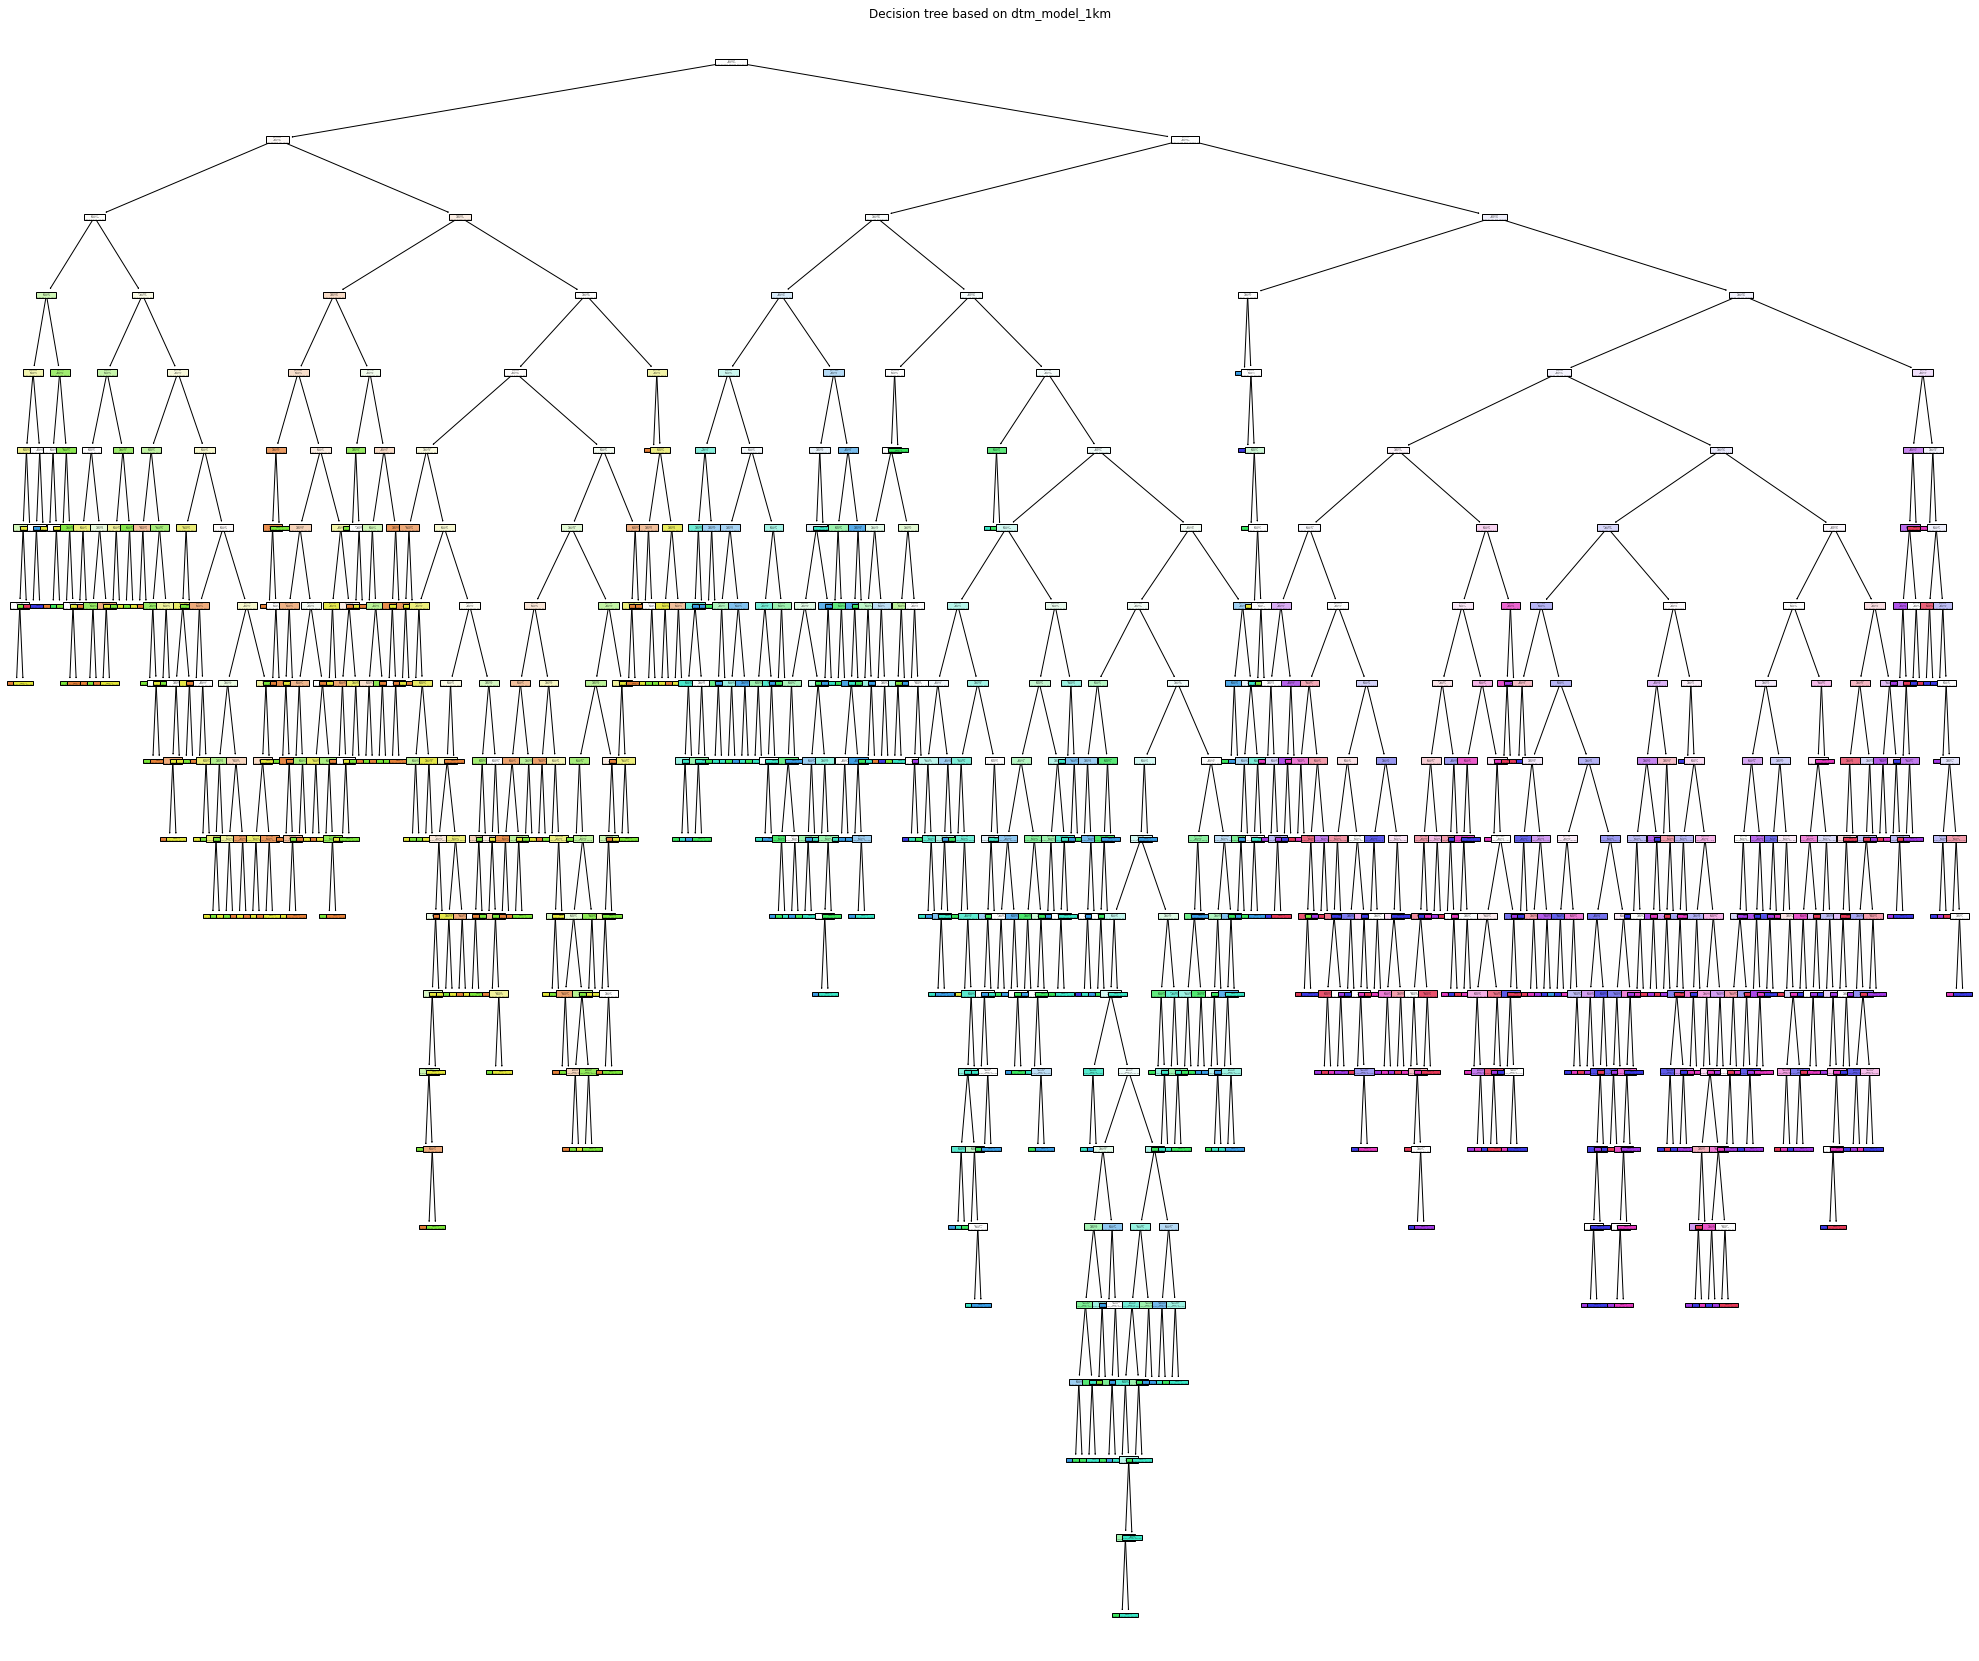

DecisionTreeClassifier confusion_matrix


<Figure size 432x288 with 0 Axes>

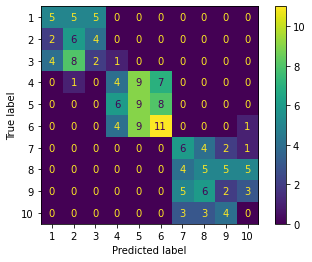

DecisionTreeClassifier Total impurity of leaves vs effective alphas


<Figure size 432x288 with 0 Axes>

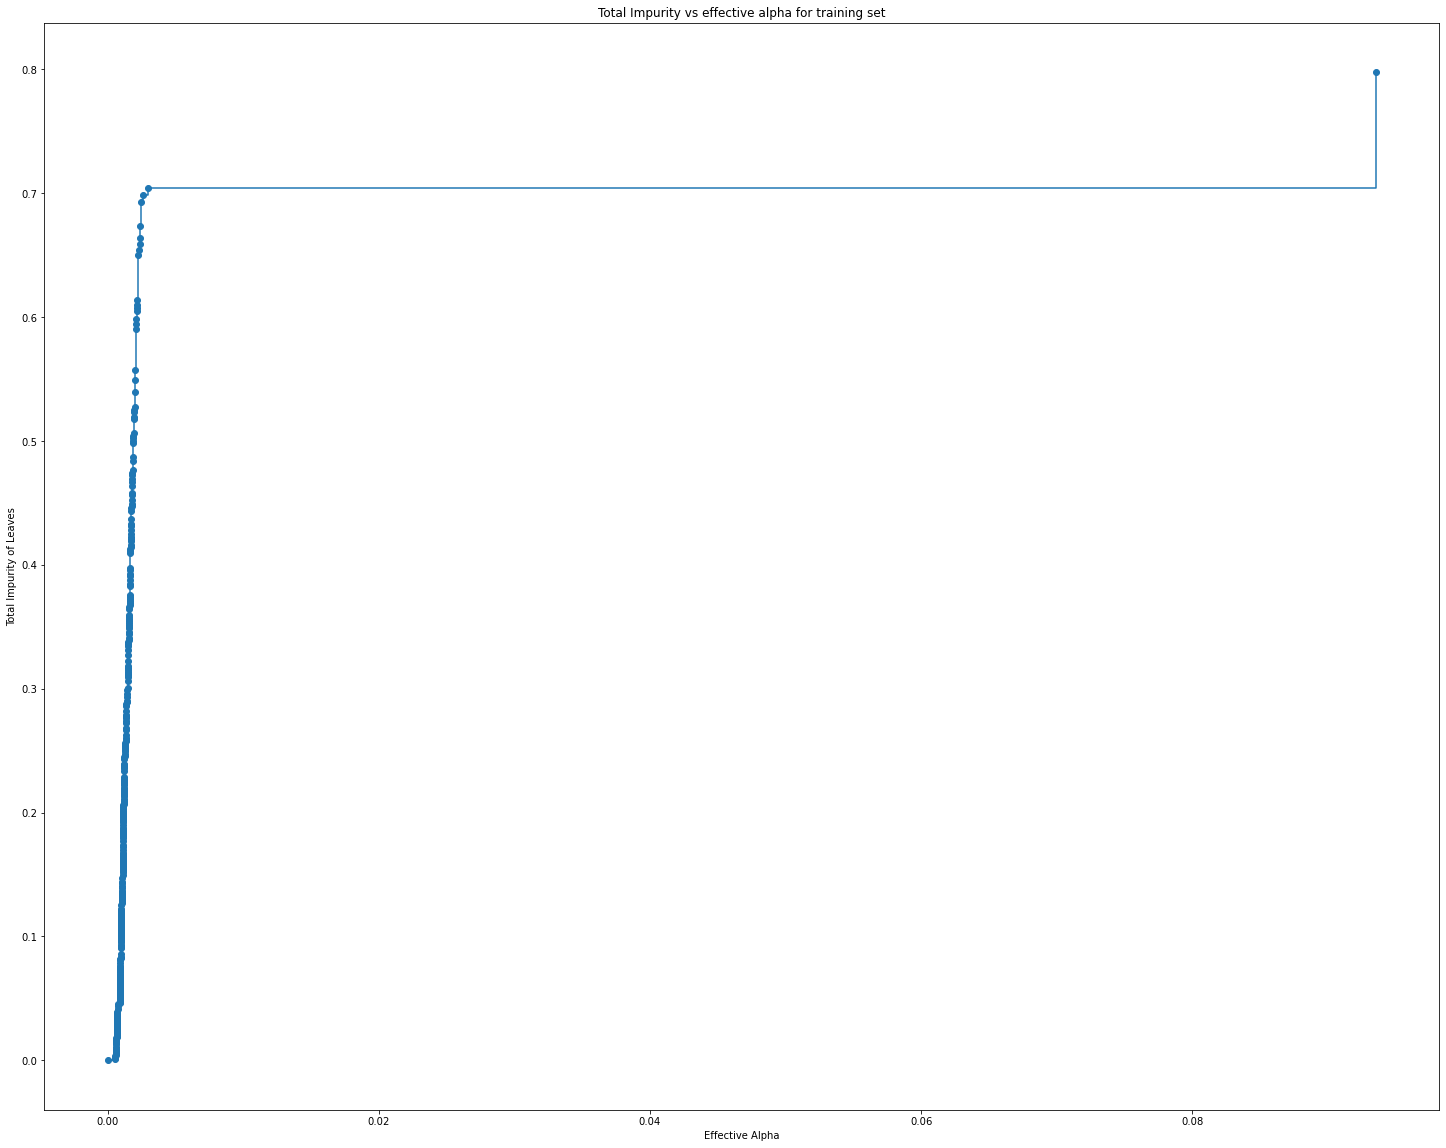

Saving dtm_model_1km.joblib
LinearRegression lr_model_1km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.8108138102860565

Visualisation lr_model_1km
-------------------------------------------------------------------------------
LinearRegression predictions plot


<Figure size 432x288 with 0 Axes>

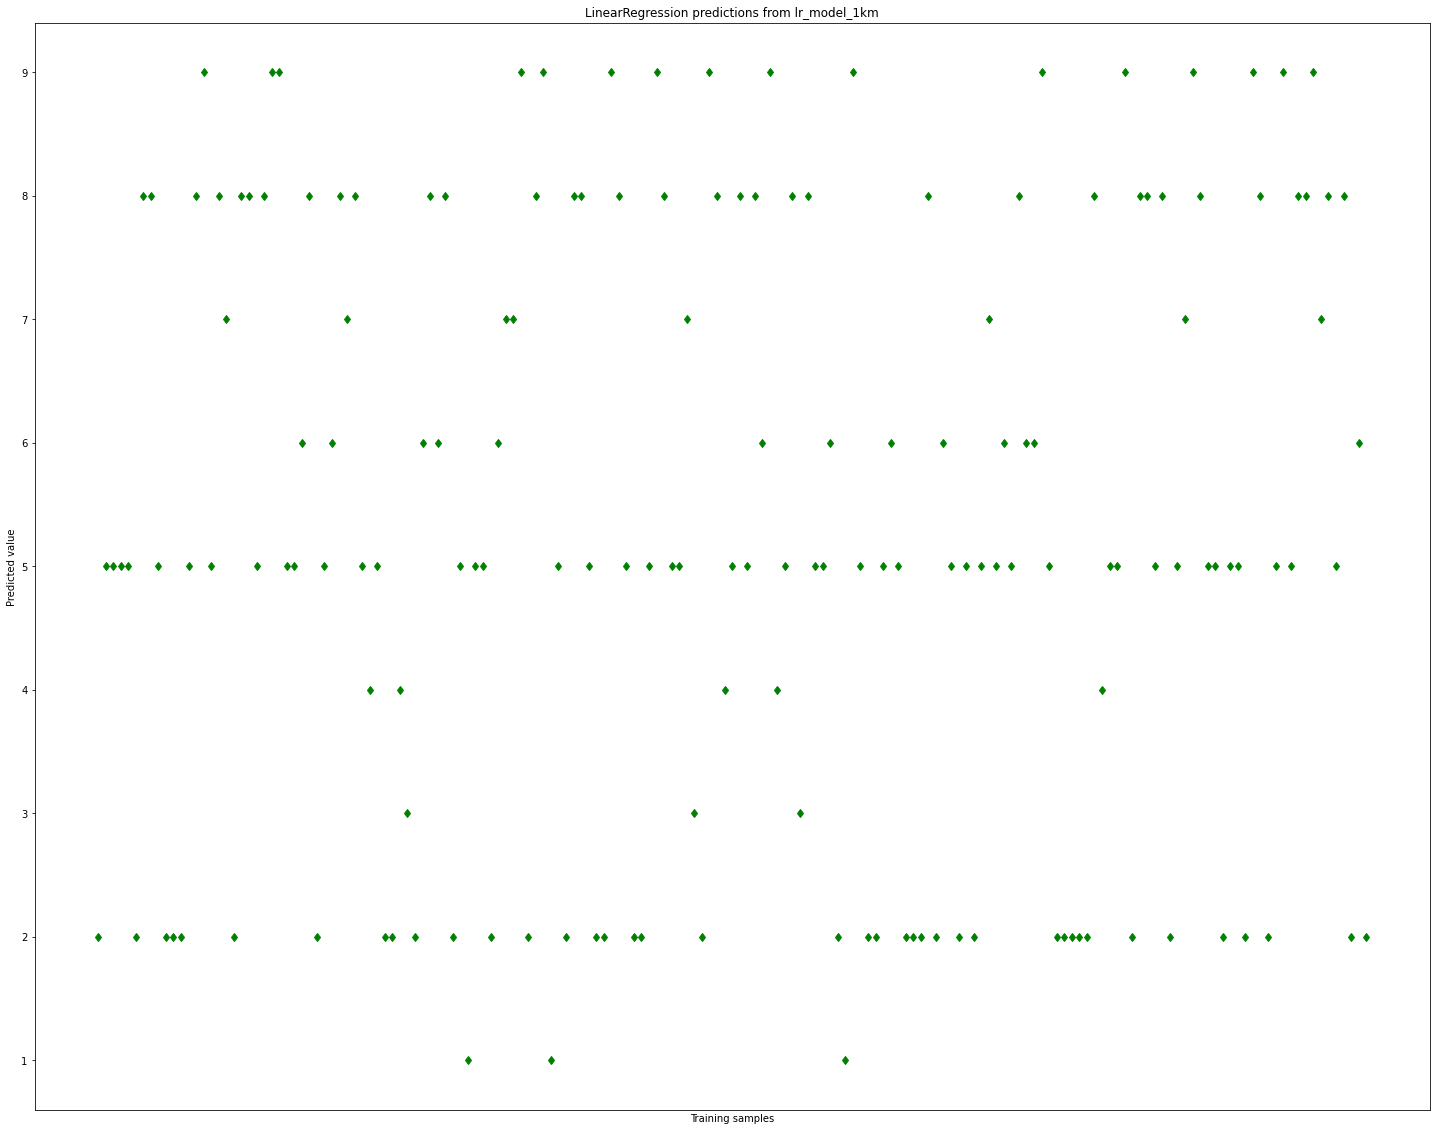

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

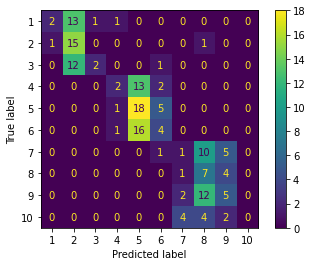

Saving lr_model_1km.joblib
KNeighborsRegressor knr_model_1km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.7776366857499057

Visualisation knr_model_1km
-------------------------------------------------------------------------------
KNeighborsRegressor predictions plot


<Figure size 432x288 with 0 Axes>

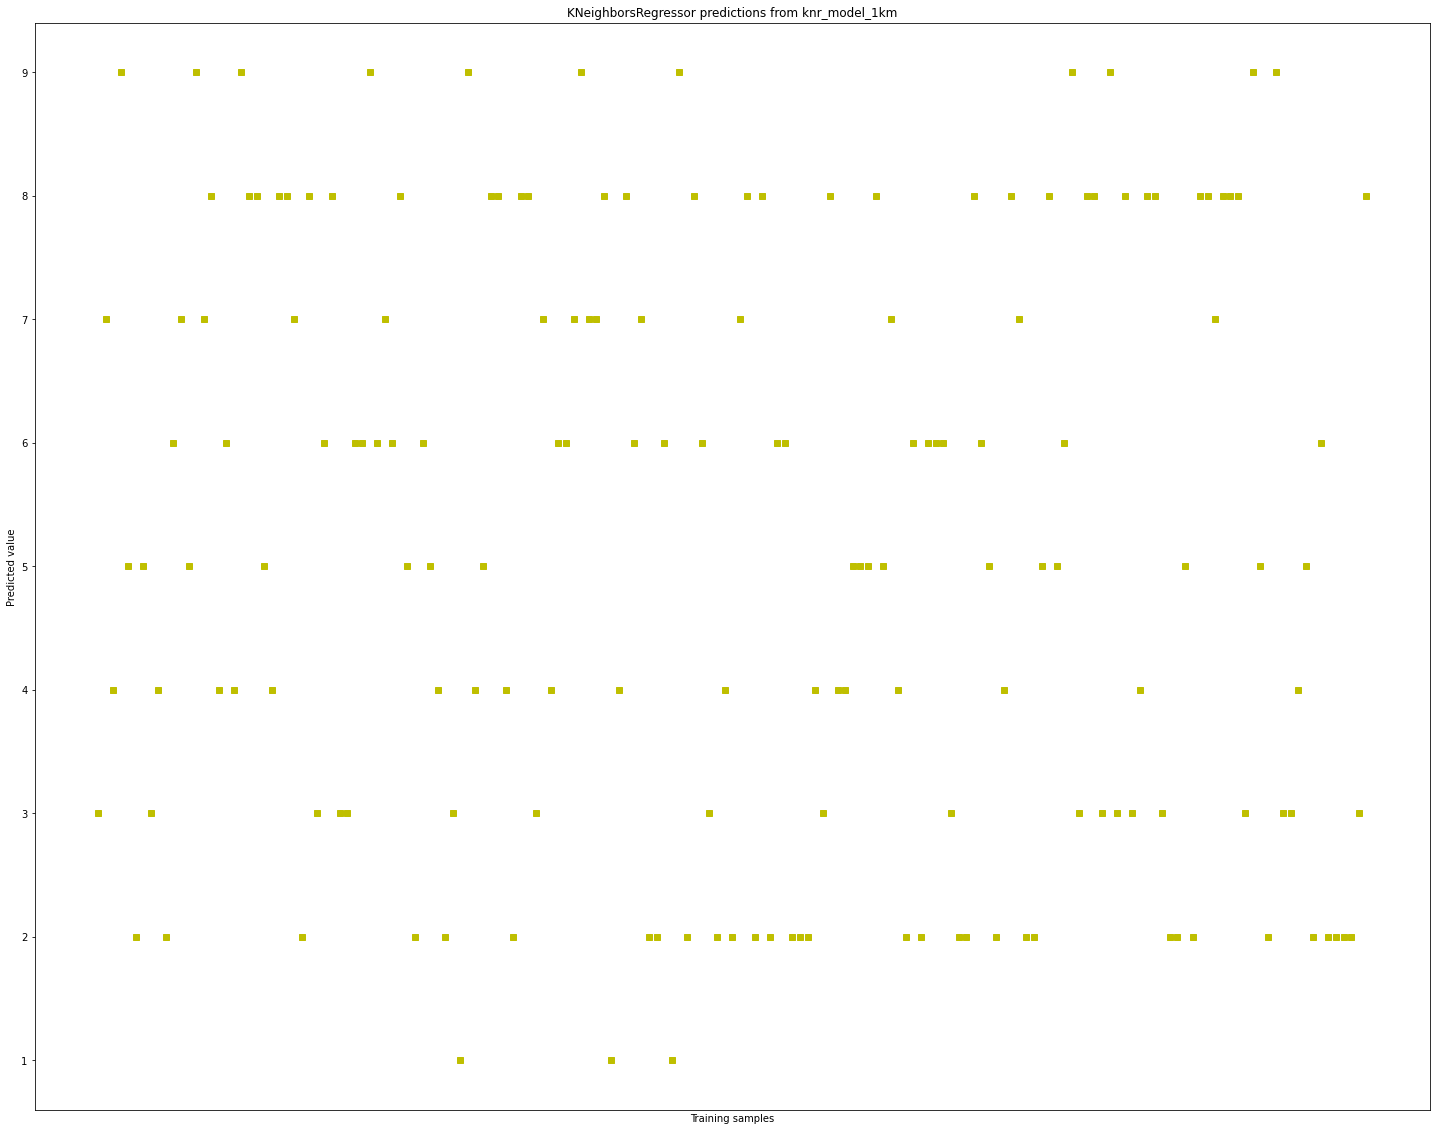

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

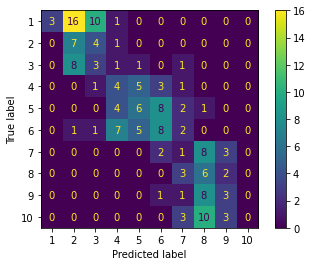

Saving knr_model_1km.joblib


<Figure size 432x288 with 0 Axes>

In [14]:
# Dataframe df_time_1km
# Training data with 1km time only
# Split data - Input (X) and Output (y)
# X - Input Data
# y - Output data
X_time_1km, y_time_1km = split_X_y_by_distance_column(df_time_1km, COLUMN_TIME_1KM_ID)

# DecisionTreeClassifier
dt_model_1km_dict = decision_tree_fit_and_measure(X_time_1km, y_time_1km)

# LinearRegression
lr_model_1km_dict = linear_reg_fit_and_measure(X_time_1km, y_time_1km)

# KNeighborsRegressor
knr_model_1km_dict = k_neigh_reg_fit_and_measure(X_time_1km, y_time_1km)

# Visualisation df_time_1km models
visualise_dt_model_by_dict(dt_model_1km_dict, 'dtm_model_1km')
visualise_lr_model_by_dict(lr_model_1km_dict, 'lr_model_1km')
visualise_knr_model_by_dict(knr_model_1km_dict, 'knr_model_1km')

DecisionTreeClassifier dtm_model_5km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.23295454545454544

Tree depth:
23

Tree number of leaves:
601

Visualisation dtm_model_5km
-------------------------------------------------------------------------------
DecisionTreeClassifier plot tree


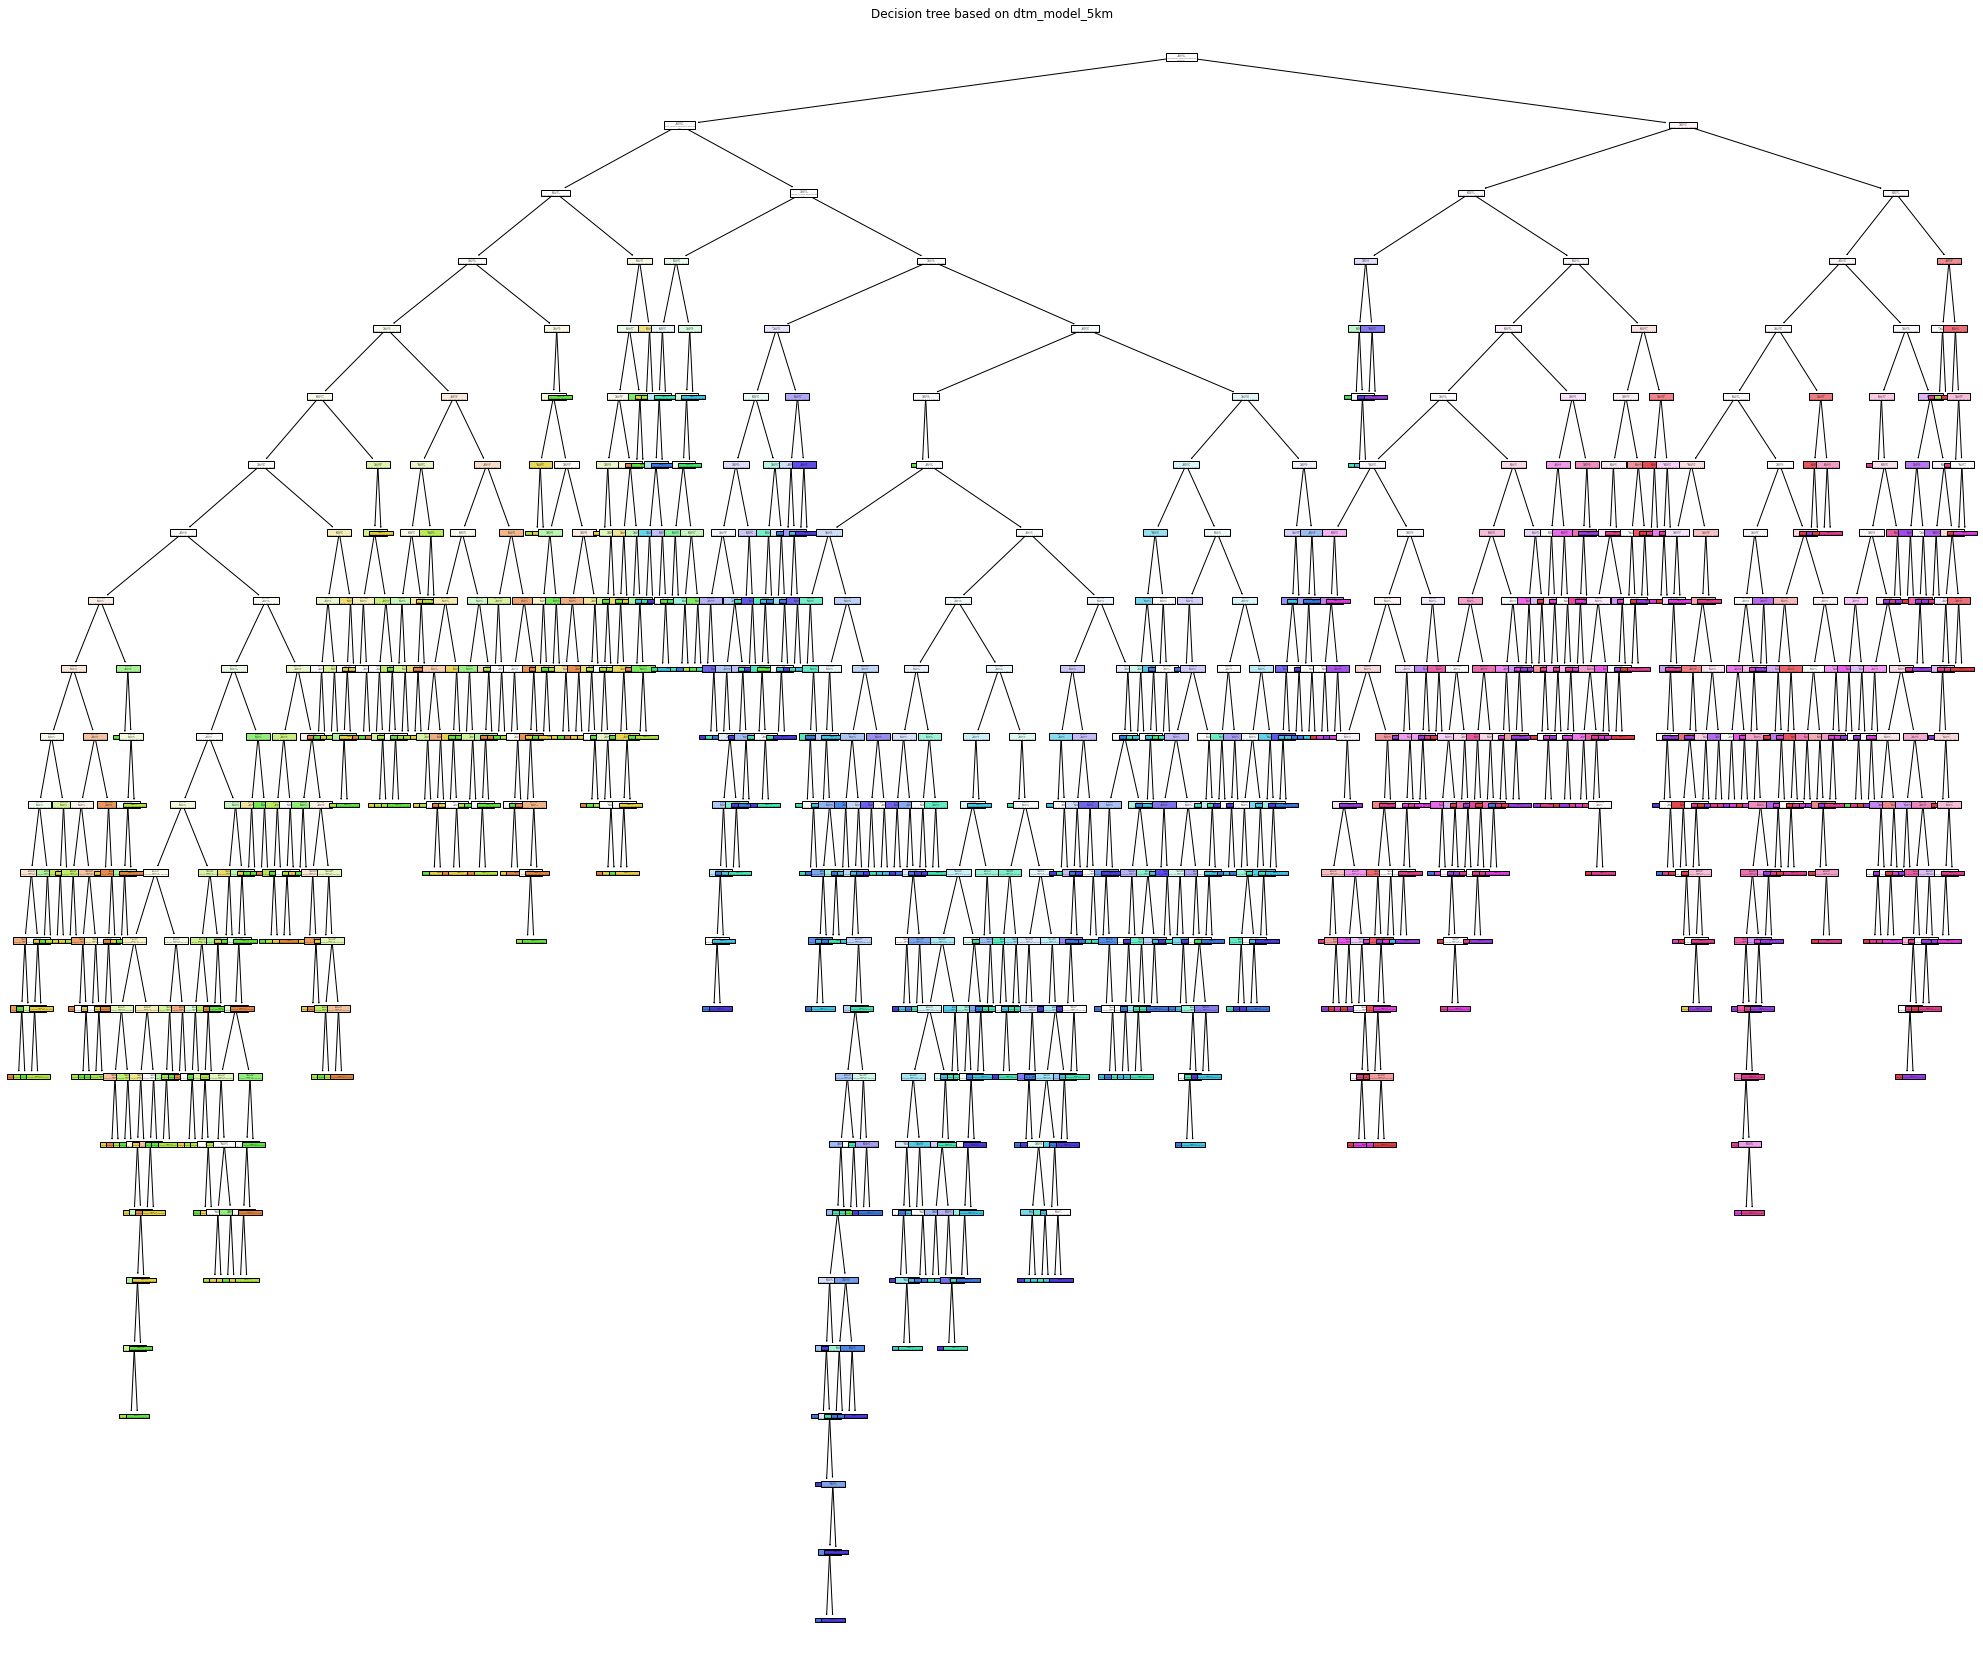

DecisionTreeClassifier confusion_matrix


<Figure size 432x288 with 0 Axes>

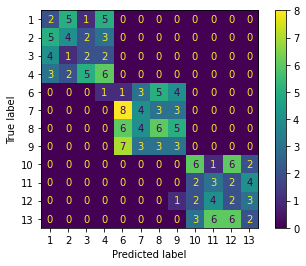

DecisionTreeClassifier Total impurity of leaves vs effective alphas


<Figure size 432x288 with 0 Axes>

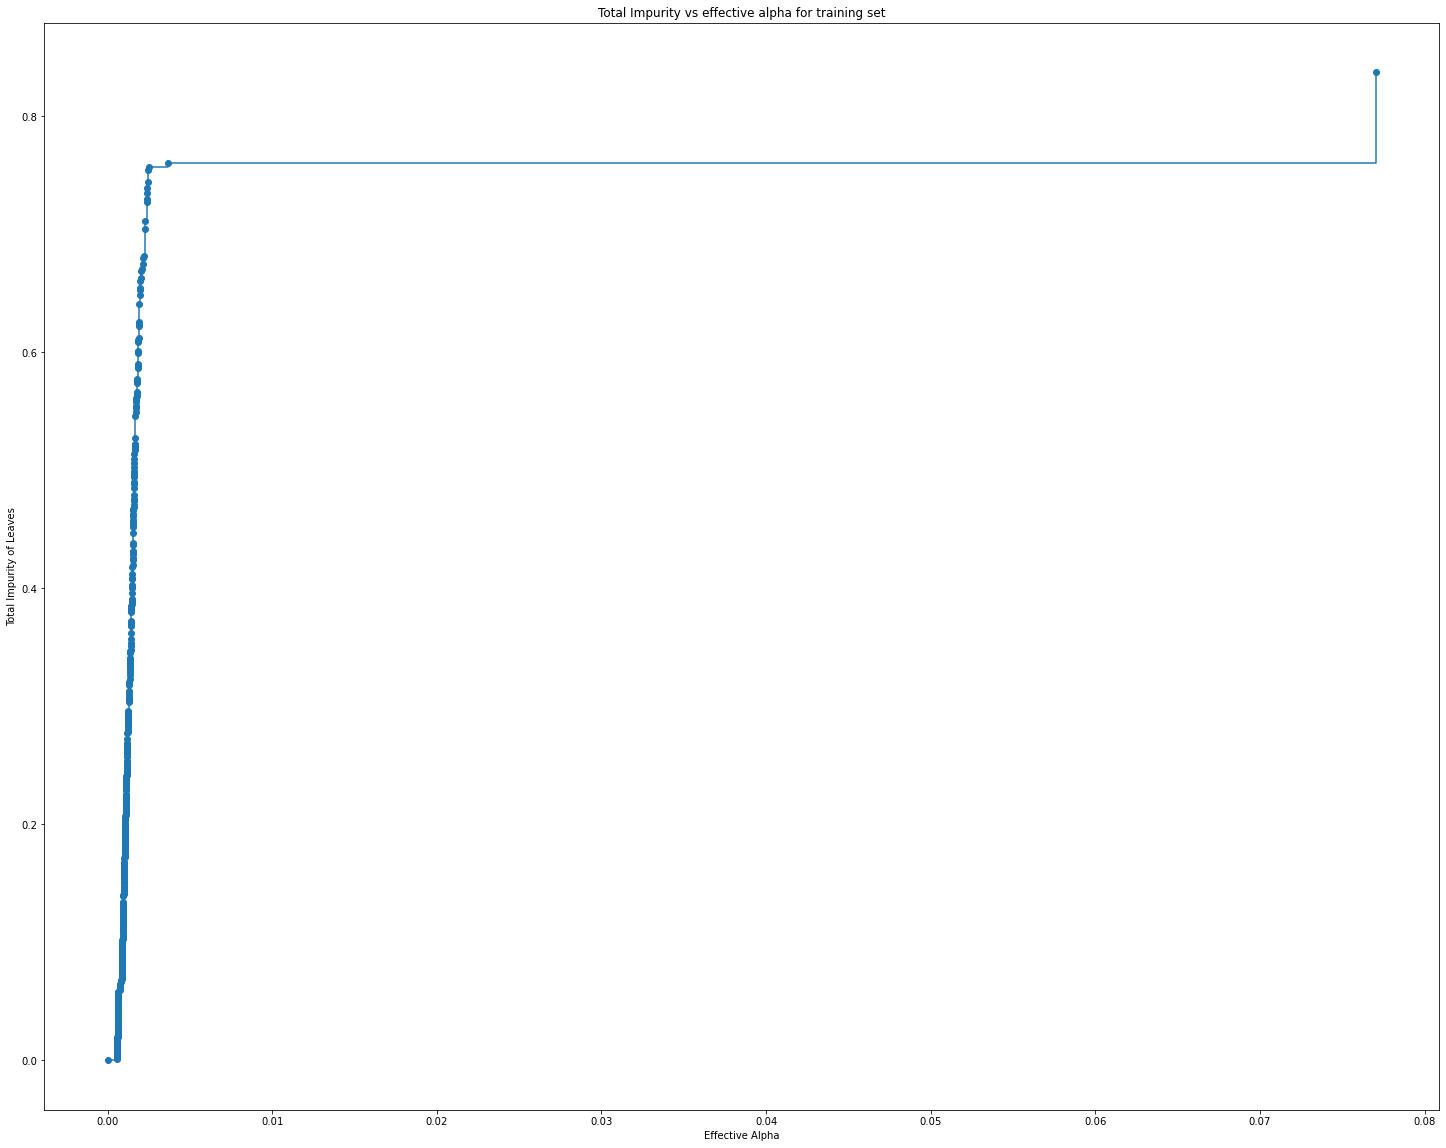

Saving dtm_model_5km.joblib
LinearRegression lr_model_5km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.8724477432644204

Visualisation lr_model_5km
-------------------------------------------------------------------------------
LinearRegression predictions plot


<Figure size 432x288 with 0 Axes>

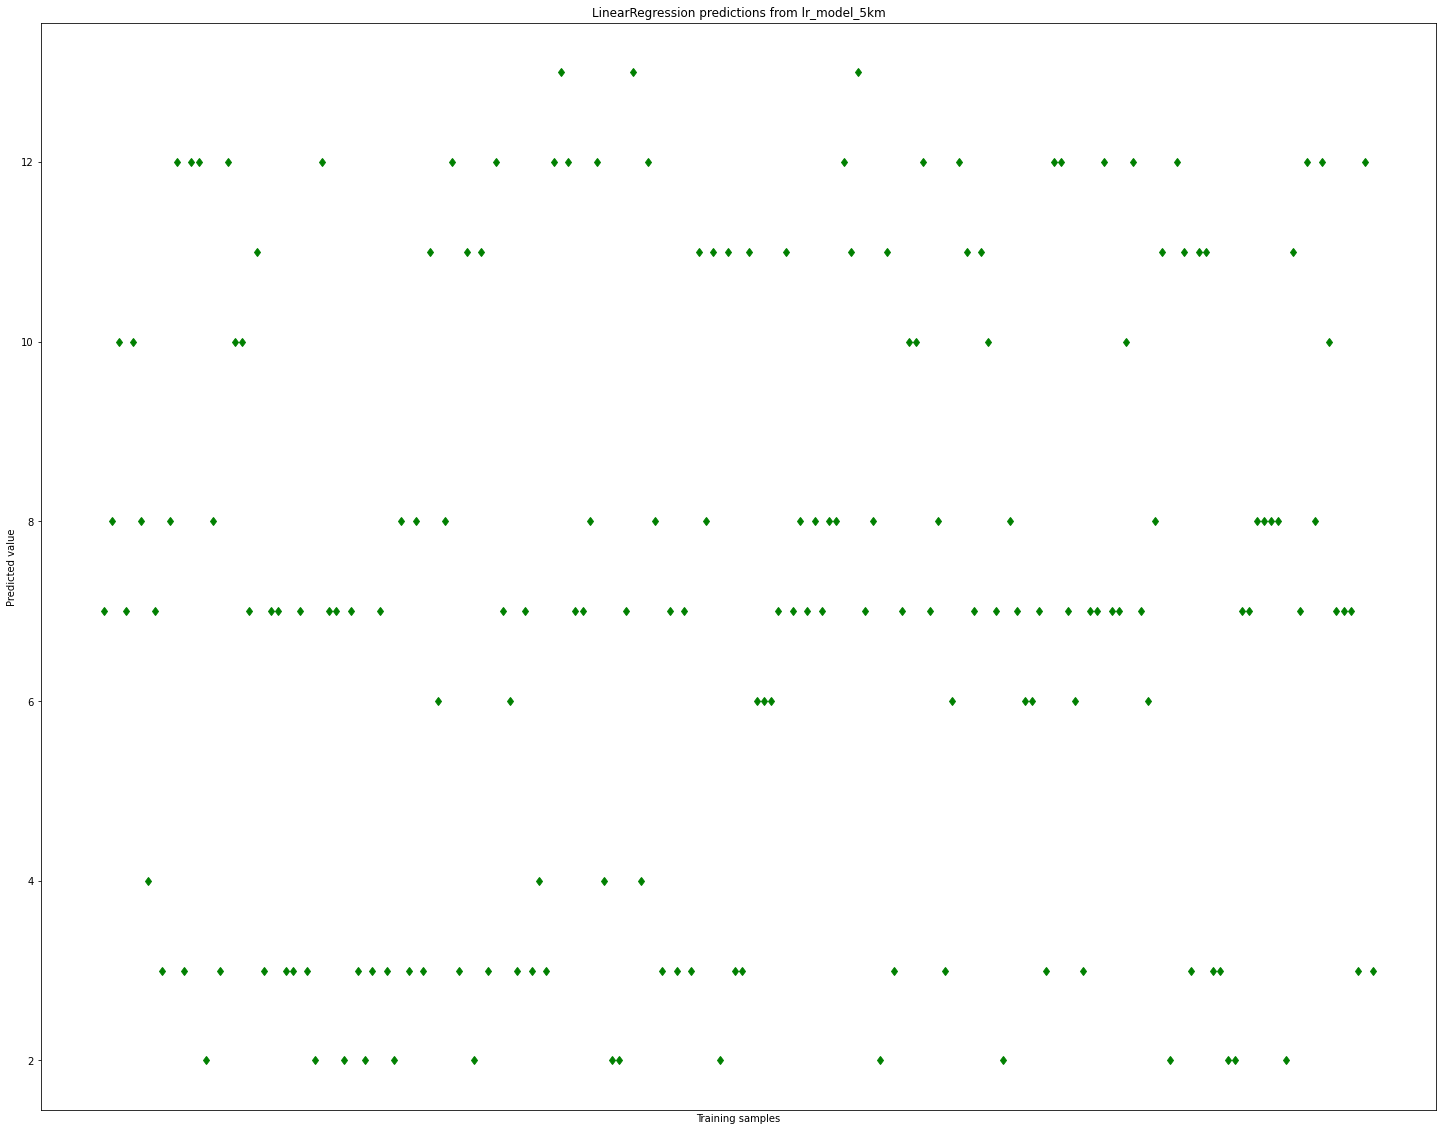

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

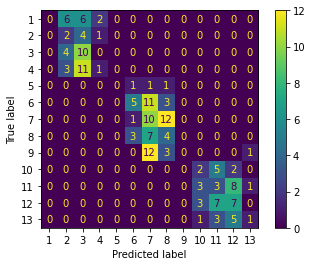

Saving lr_model_5km.joblib
KNeighborsRegressor knr_model_5km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.7676491434794641

Visualisation knr_model_5km
-------------------------------------------------------------------------------
KNeighborsRegressor predictions plot


<Figure size 432x288 with 0 Axes>

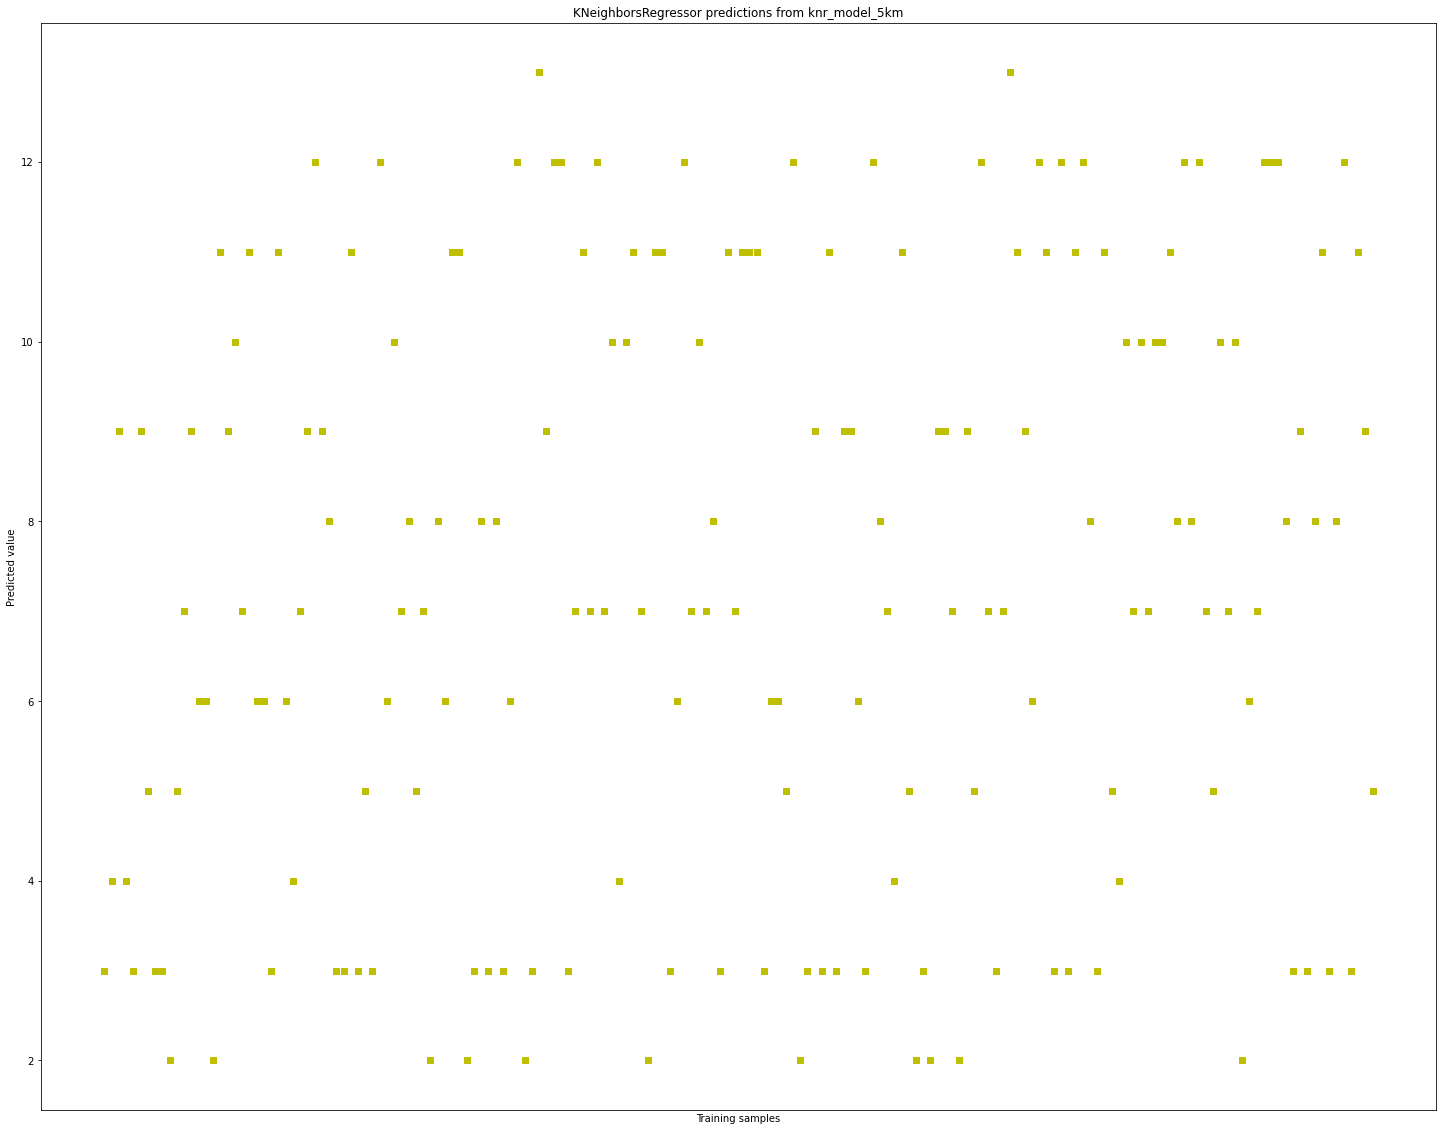

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

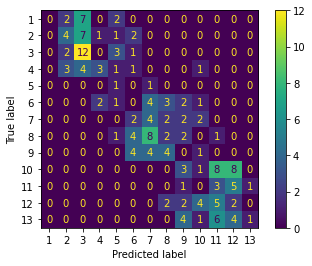

Saving knr_model_5km.joblib


<Figure size 432x288 with 0 Axes>

In [15]:
# Dataframe df_time_5km
# Training data with 5km time only
# Split data - Input (X) and Output (y)
# X - Input Data
# y - Output data
X_time_5km, y_time_5km = split_X_y_by_distance_column(df_time_5km, COLUMN_TIME_5KM_ID)


# DecisionTreeClassifier
dt_model_5km_dict = decision_tree_fit_and_measure(X_time_5km, y_time_5km)

# LinearRegression
lr_model_5km_dict = linear_reg_fit_and_measure(X_time_5km, y_time_5km)

# KNeighborsRegressor
knr_model_5km_dict = k_neigh_reg_fit_and_measure(X_time_5km, y_time_5km)

# Visualisation df_time_5km models
visualise_dt_model_by_dict(dt_model_5km_dict, 'dtm_model_5km')
visualise_lr_model_by_dict(lr_model_5km_dict, 'lr_model_5km')
visualise_knr_model_by_dict(knr_model_5km_dict, 'knr_model_5km')

DecisionTreeClassifier dtm_model_10km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.2832369942196532

Tree depth:
18

Tree number of leaves:
569

Visualisation dtm_model_10km
-------------------------------------------------------------------------------
DecisionTreeClassifier plot tree


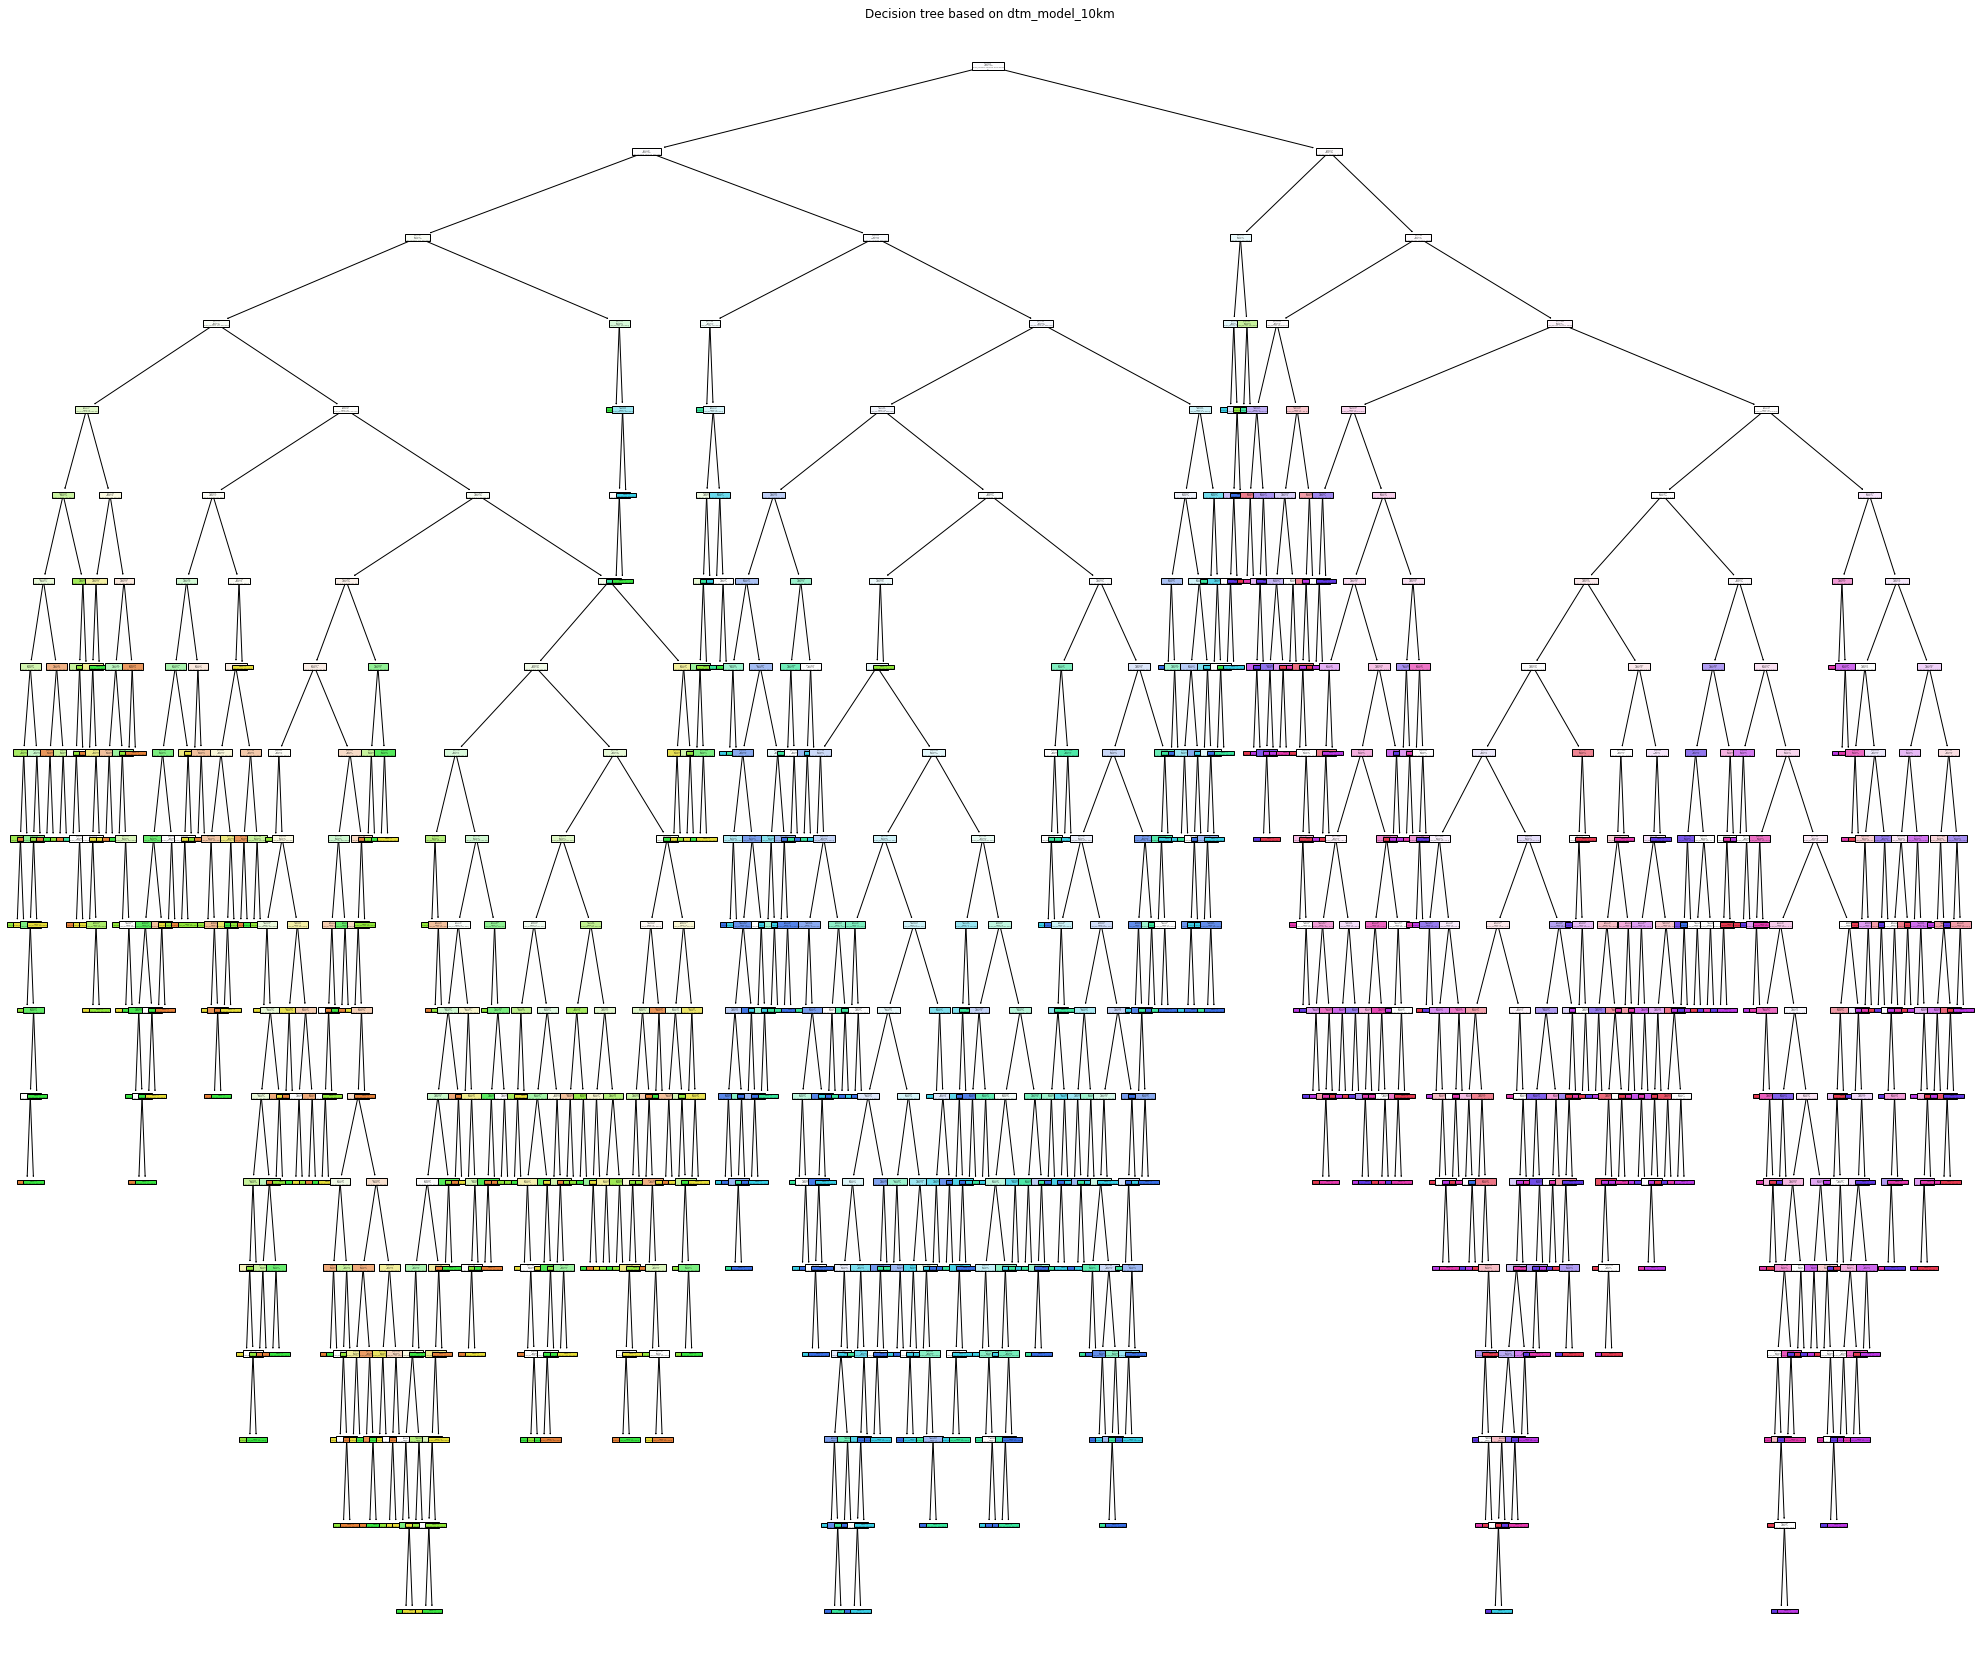

DecisionTreeClassifier confusion_matrix


<Figure size 432x288 with 0 Axes>

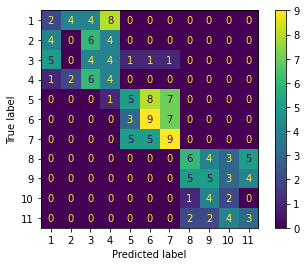

DecisionTreeClassifier Total impurity of leaves vs effective alphas


<Figure size 432x288 with 0 Axes>

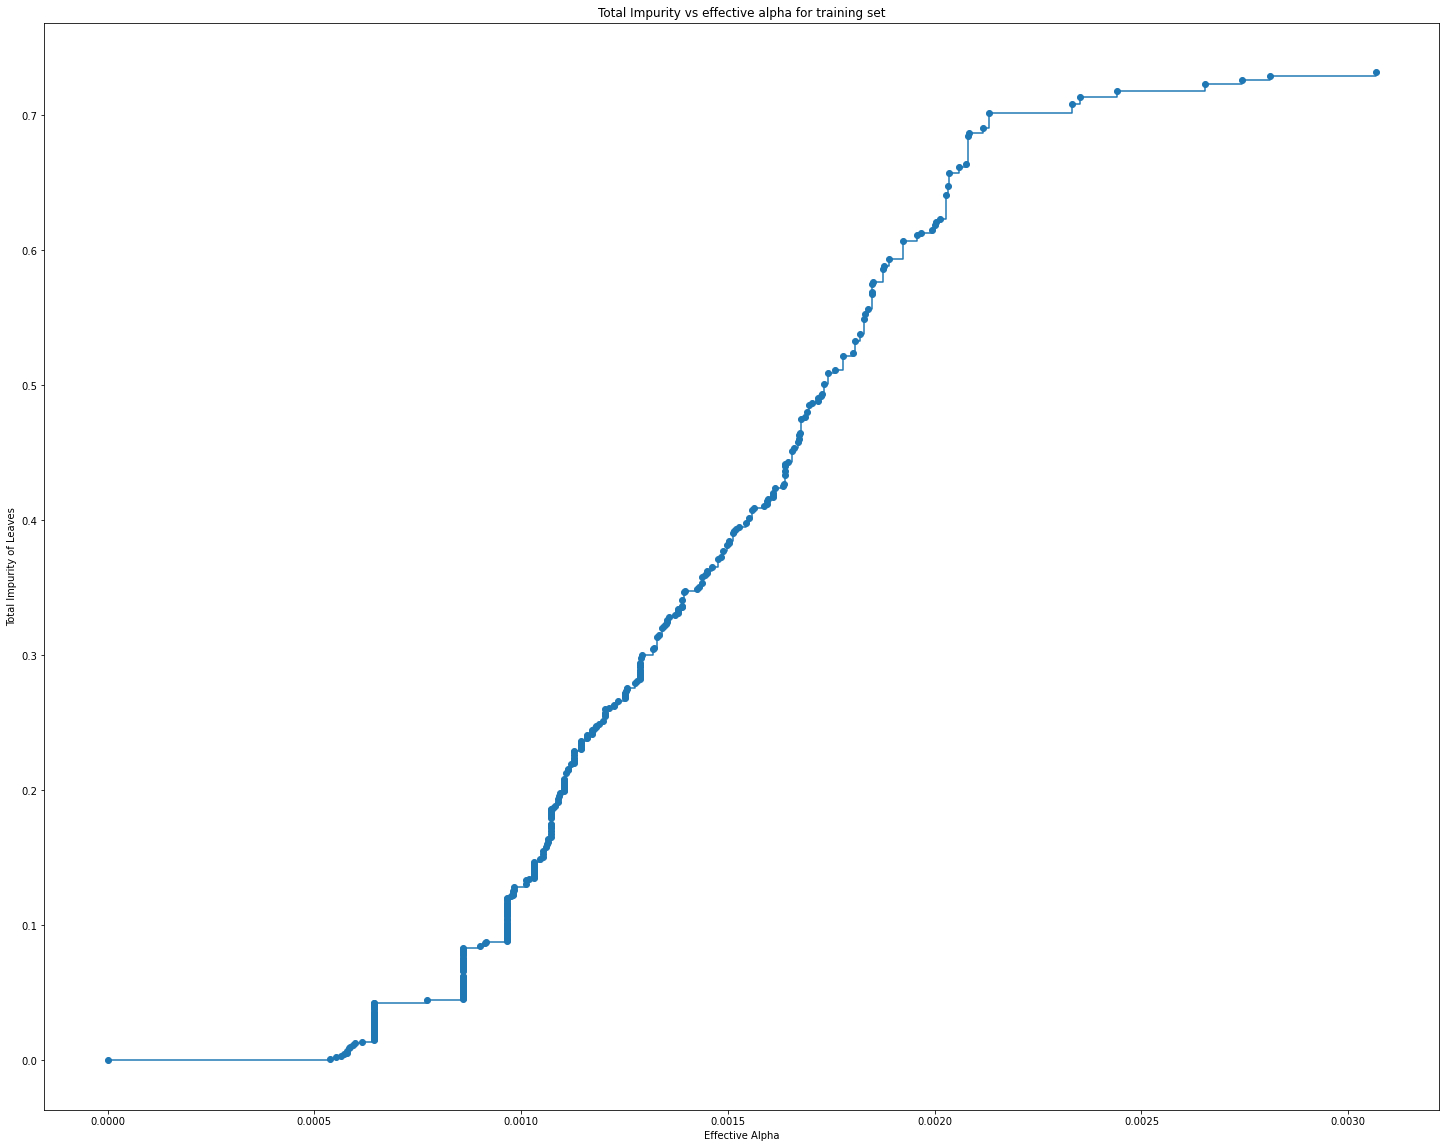

Saving dtm_model_10km.joblib
LinearRegression lr_model_10km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.8561312175162306

Visualisation lr_model_10km
-------------------------------------------------------------------------------
LinearRegression predictions plot


<Figure size 432x288 with 0 Axes>

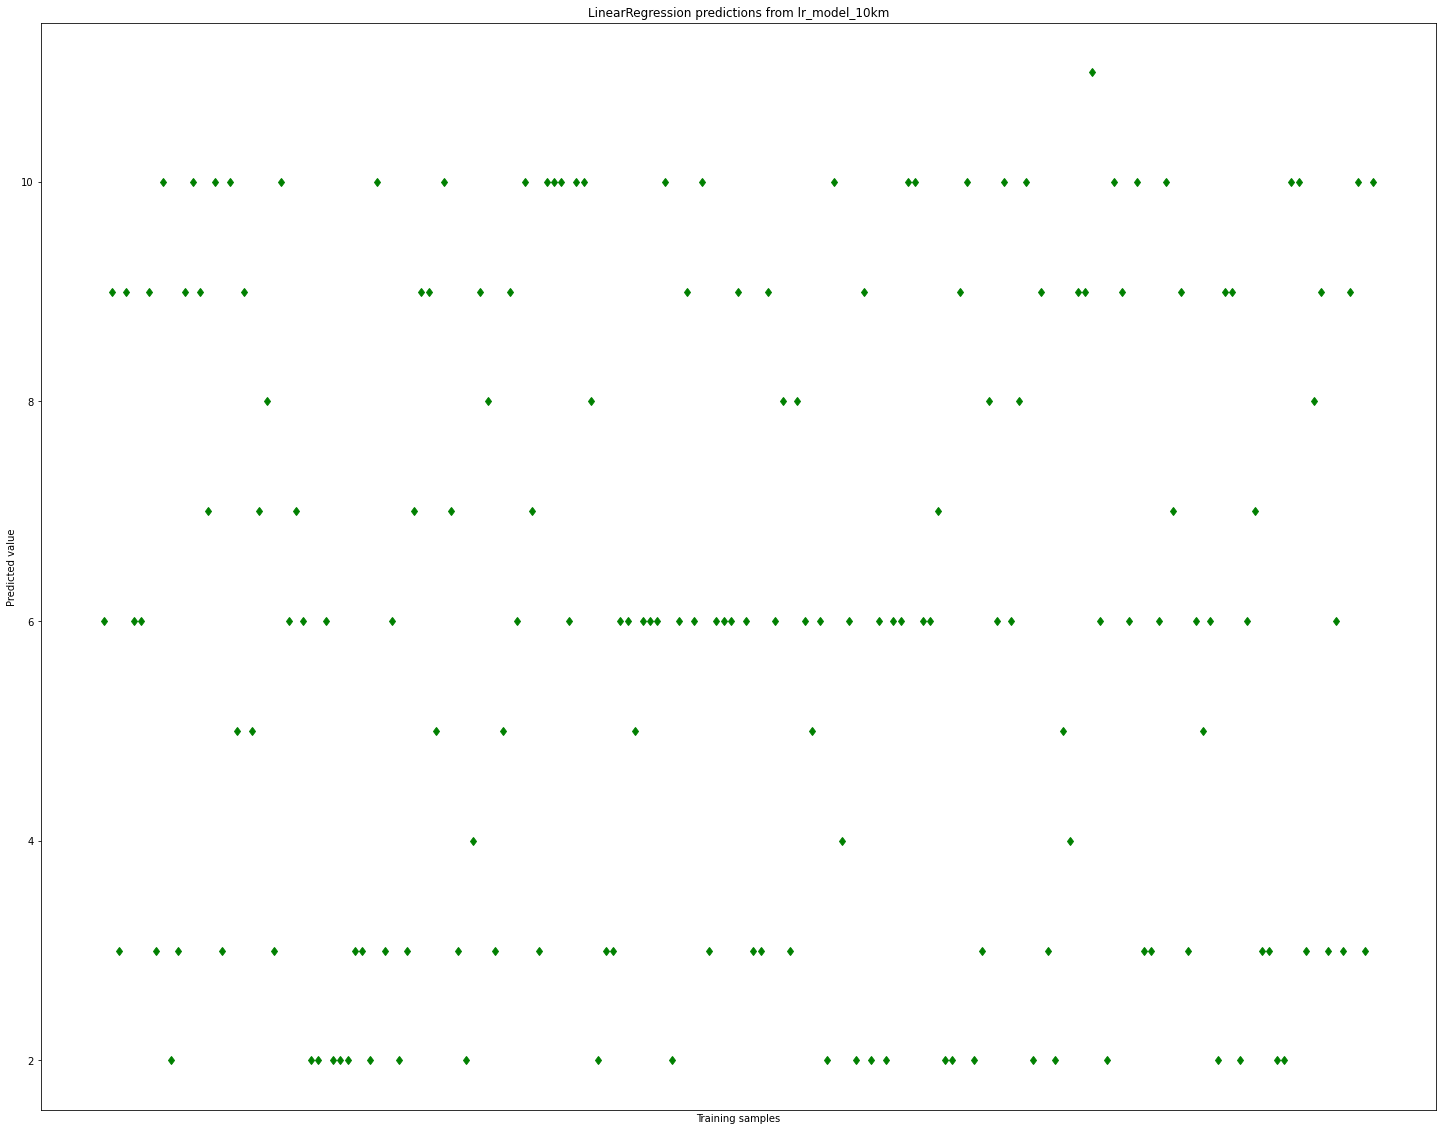

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

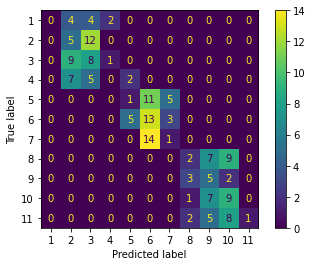

Saving lr_model_10km.joblib
KNeighborsRegressor knr_model_10km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.7671274664084251

Visualisation knr_model_10km
-------------------------------------------------------------------------------
KNeighborsRegressor predictions plot


<Figure size 432x288 with 0 Axes>

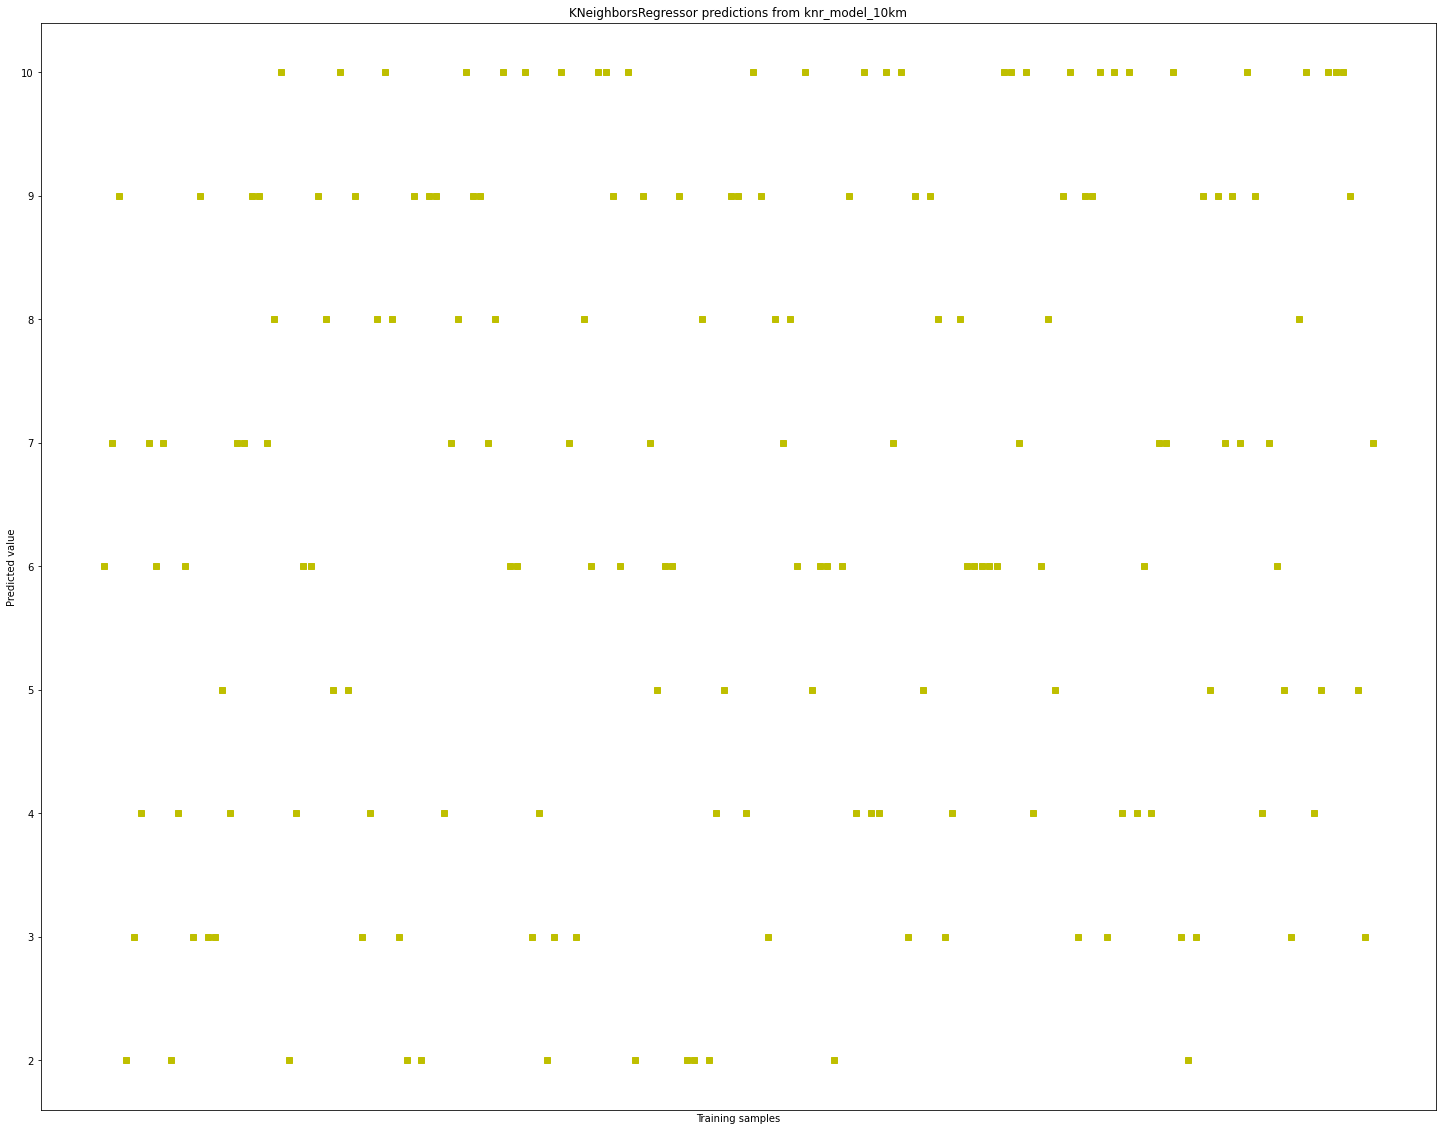

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

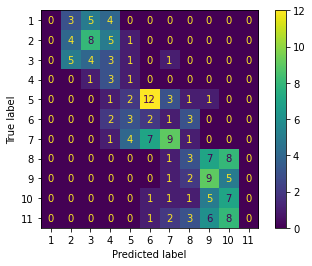

Saving knr_model_10km.joblib


<Figure size 432x288 with 0 Axes>

In [16]:
# Dataframe df_time_10km
# Training data with 10km time only
# Split data - Input (X) and Output (y)
# X - Input Data
# y - Output data
X_time_10km, y_time_10km = split_X_y_by_distance_column(df_time_10km, COLUMN_TIME_10KM_ID)

# DecisionTreeClassifier
dt_model_10km_dict = decision_tree_fit_and_measure(X_time_10km, y_time_10km)

# LinearRegression
lr_model_10km_dict = linear_reg_fit_and_measure(X_time_10km, y_time_10km)

# KNeighborsRegressor
knr_model_10km_dict = k_neigh_reg_fit_and_measure(X_time_10km, y_time_10km)

# Visualisation df_time_10km models
visualise_dt_model_by_dict(dt_model_10km_dict, 'dtm_model_10km')
visualise_lr_model_by_dict(lr_model_10km_dict, 'lr_model_10km')
visualise_knr_model_by_dict(knr_model_10km_dict, 'knr_model_10km')

DecisionTreeClassifier dtm_model_21km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.28823529411764703

Tree depth:
18

Tree number of leaves:
547

Visualisation dtm_model_21km
-------------------------------------------------------------------------------
DecisionTreeClassifier plot tree


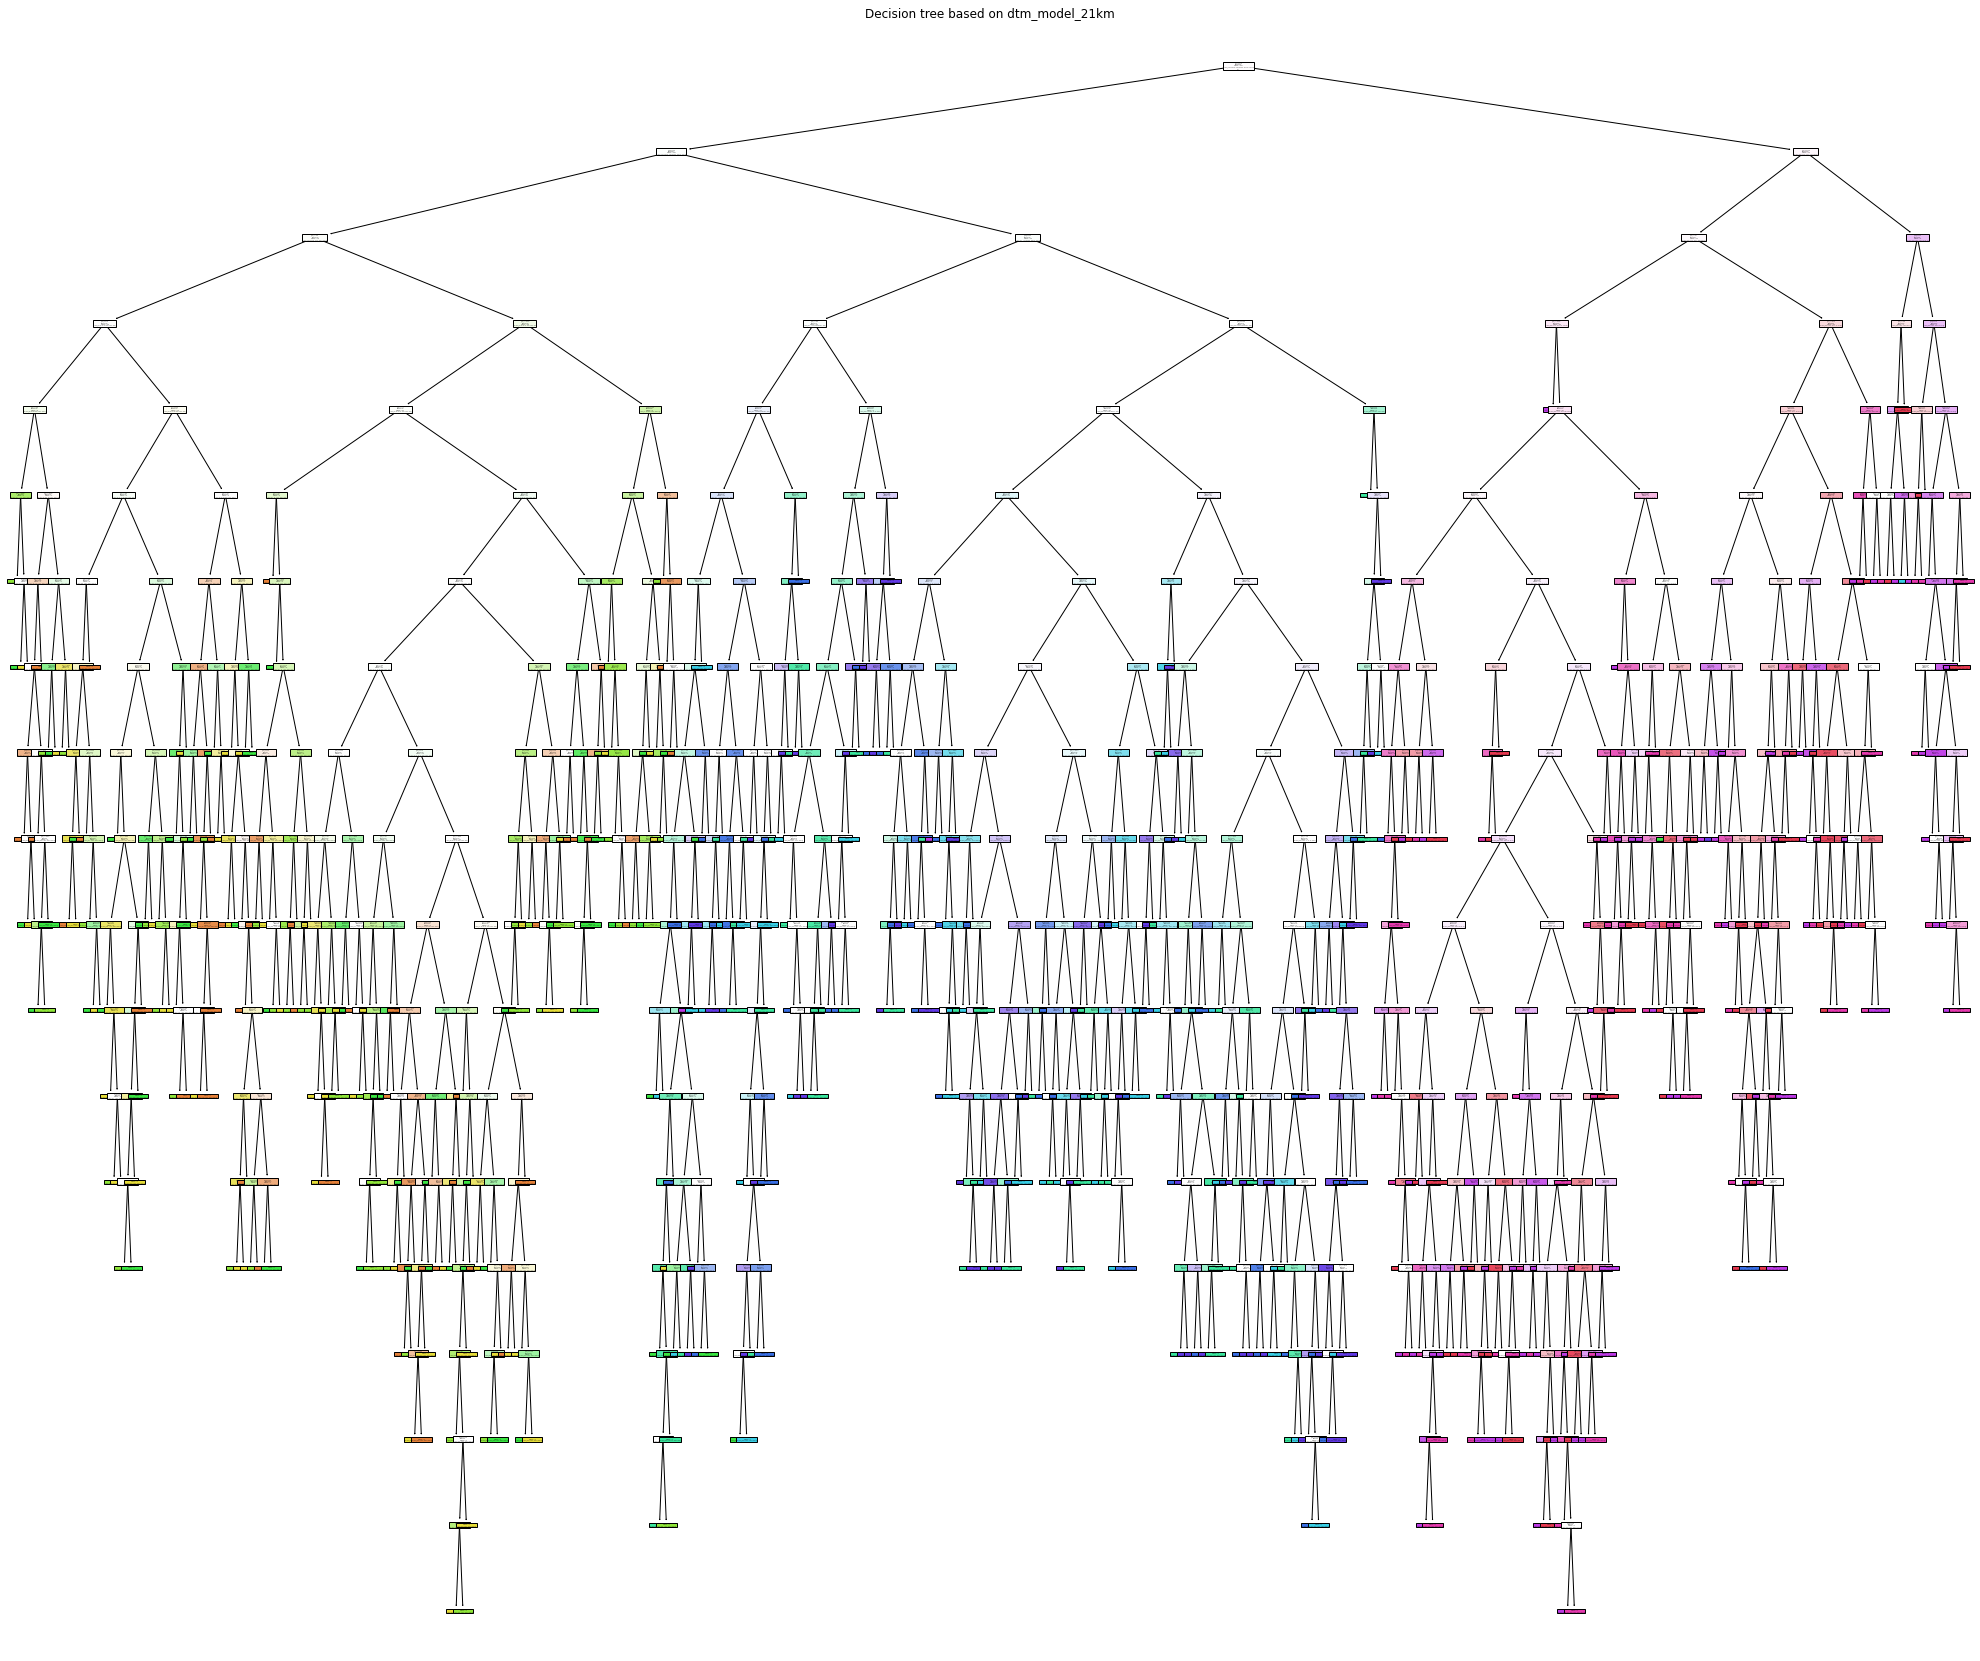

DecisionTreeClassifier confusion_matrix


<Figure size 432x288 with 0 Axes>

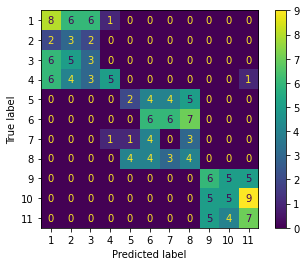

DecisionTreeClassifier Total impurity of leaves vs effective alphas


<Figure size 432x288 with 0 Axes>

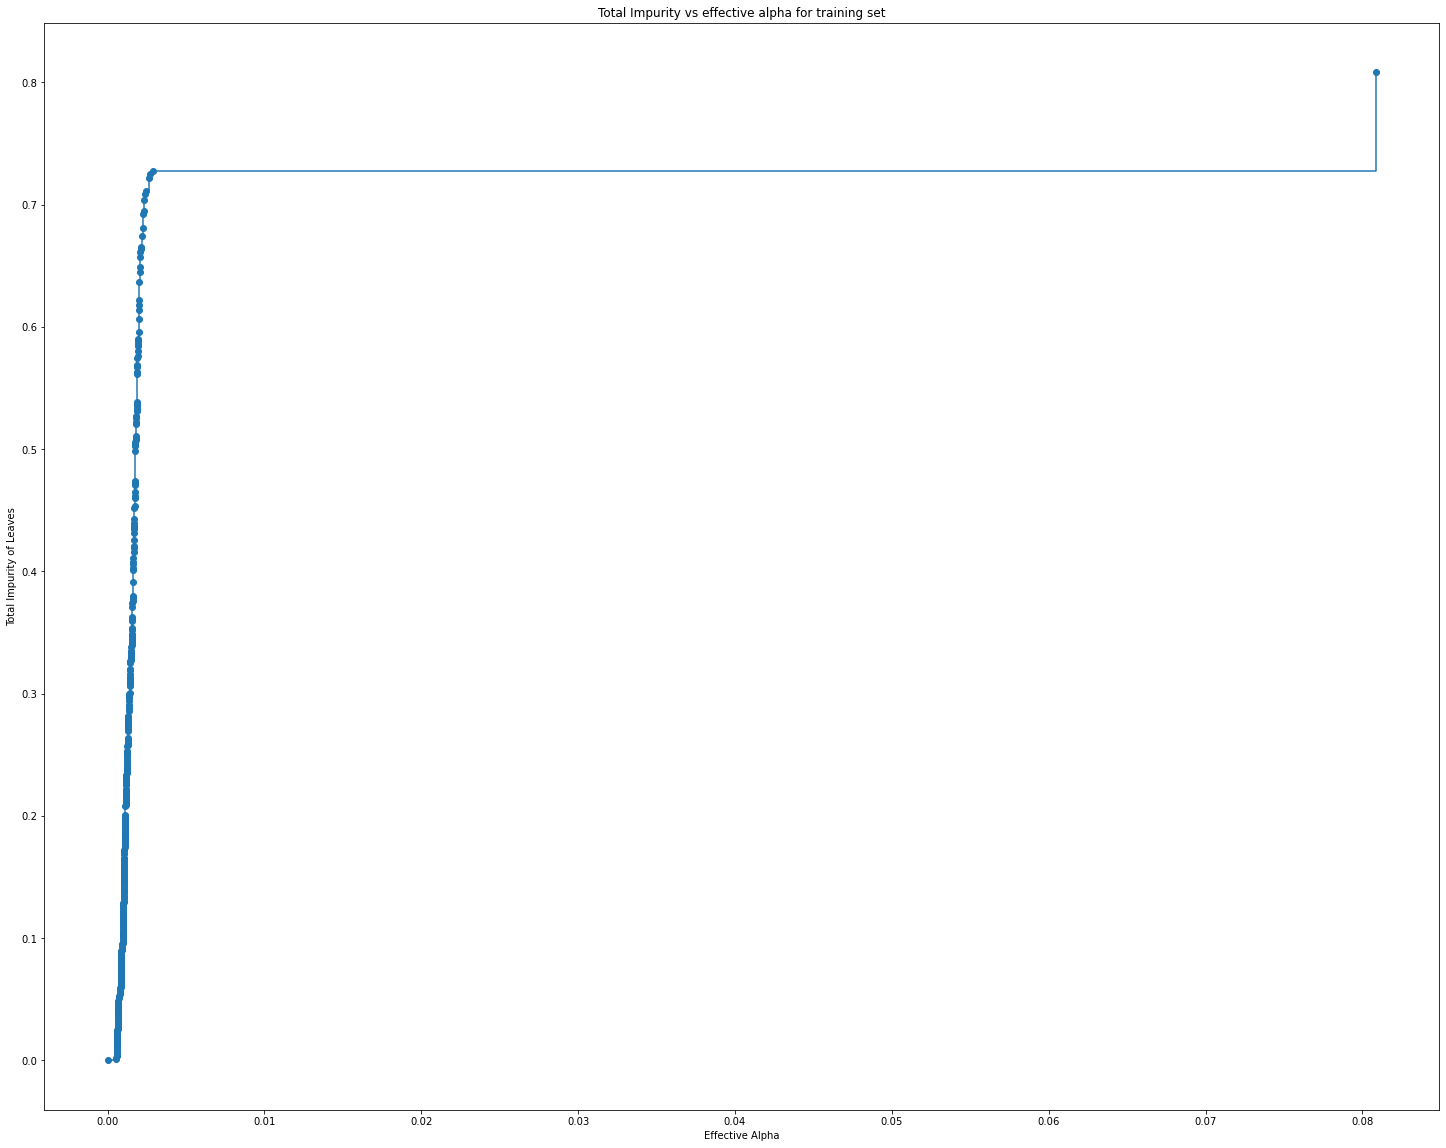

Saving dtm_model_21km.joblib
LinearRegression lr_model_21km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.8581768672228226

Visualisation lr_model_21km
-------------------------------------------------------------------------------
LinearRegression predictions plot


<Figure size 432x288 with 0 Axes>

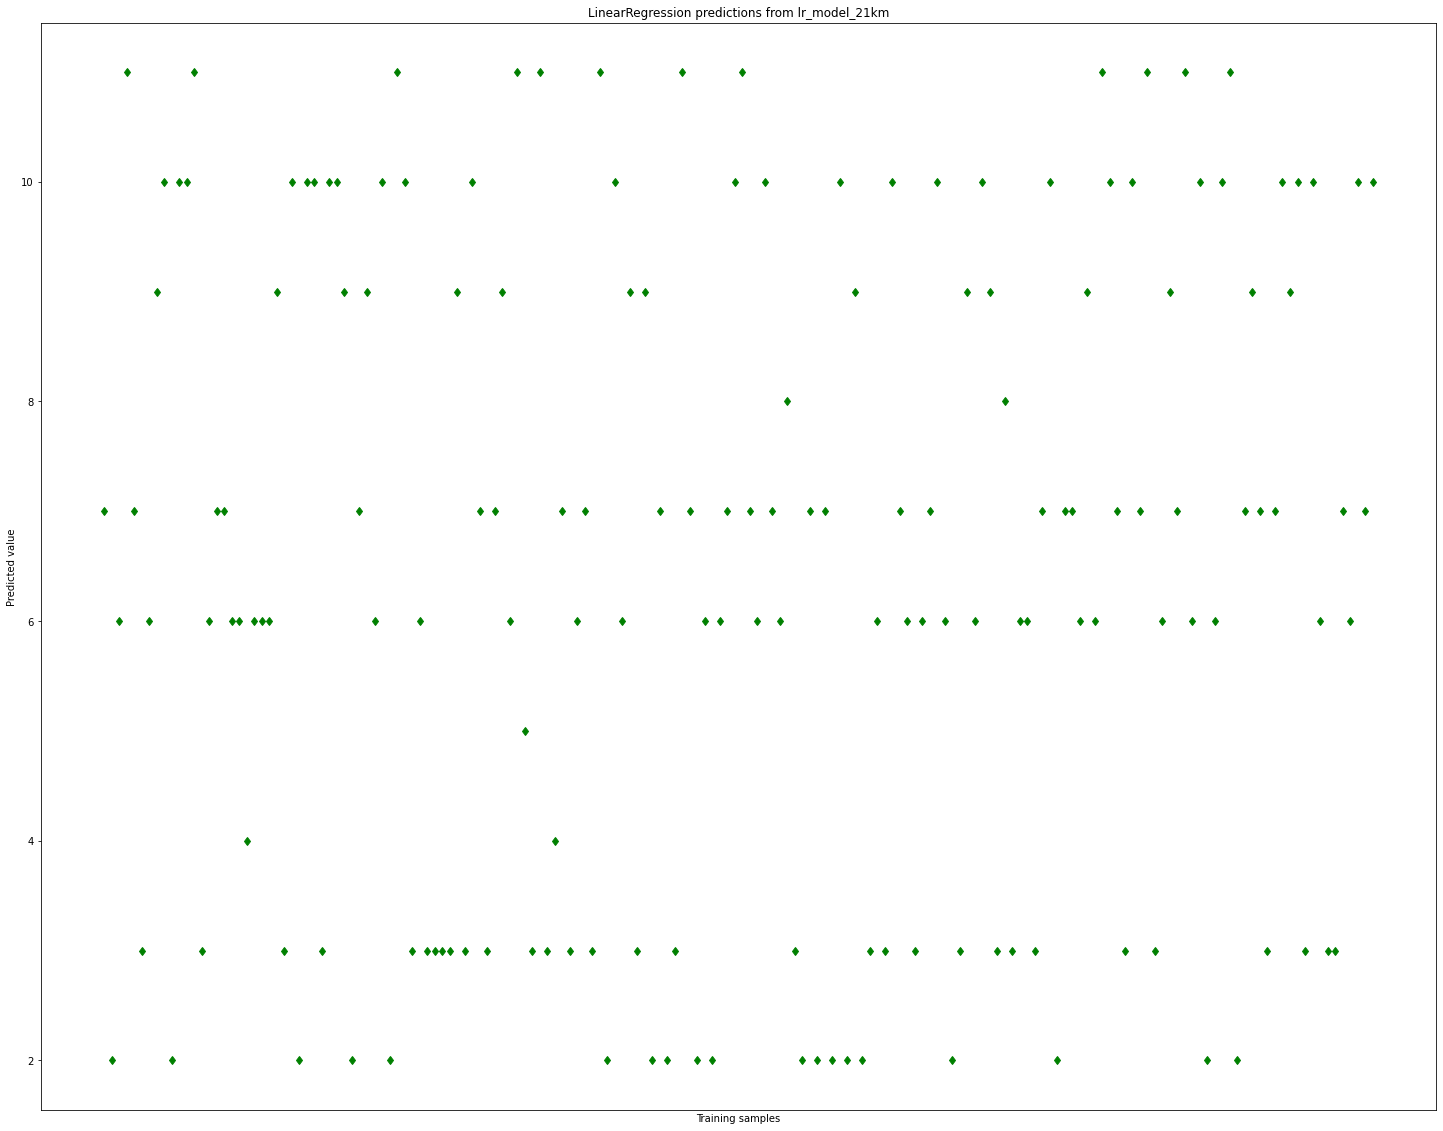

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

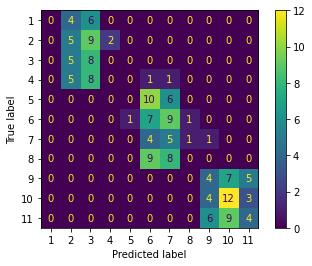

Saving lr_model_21km.joblib
KNeighborsRegressor knr_model_21km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.7575490500465712

Visualisation knr_model_21km
-------------------------------------------------------------------------------
KNeighborsRegressor predictions plot


<Figure size 432x288 with 0 Axes>

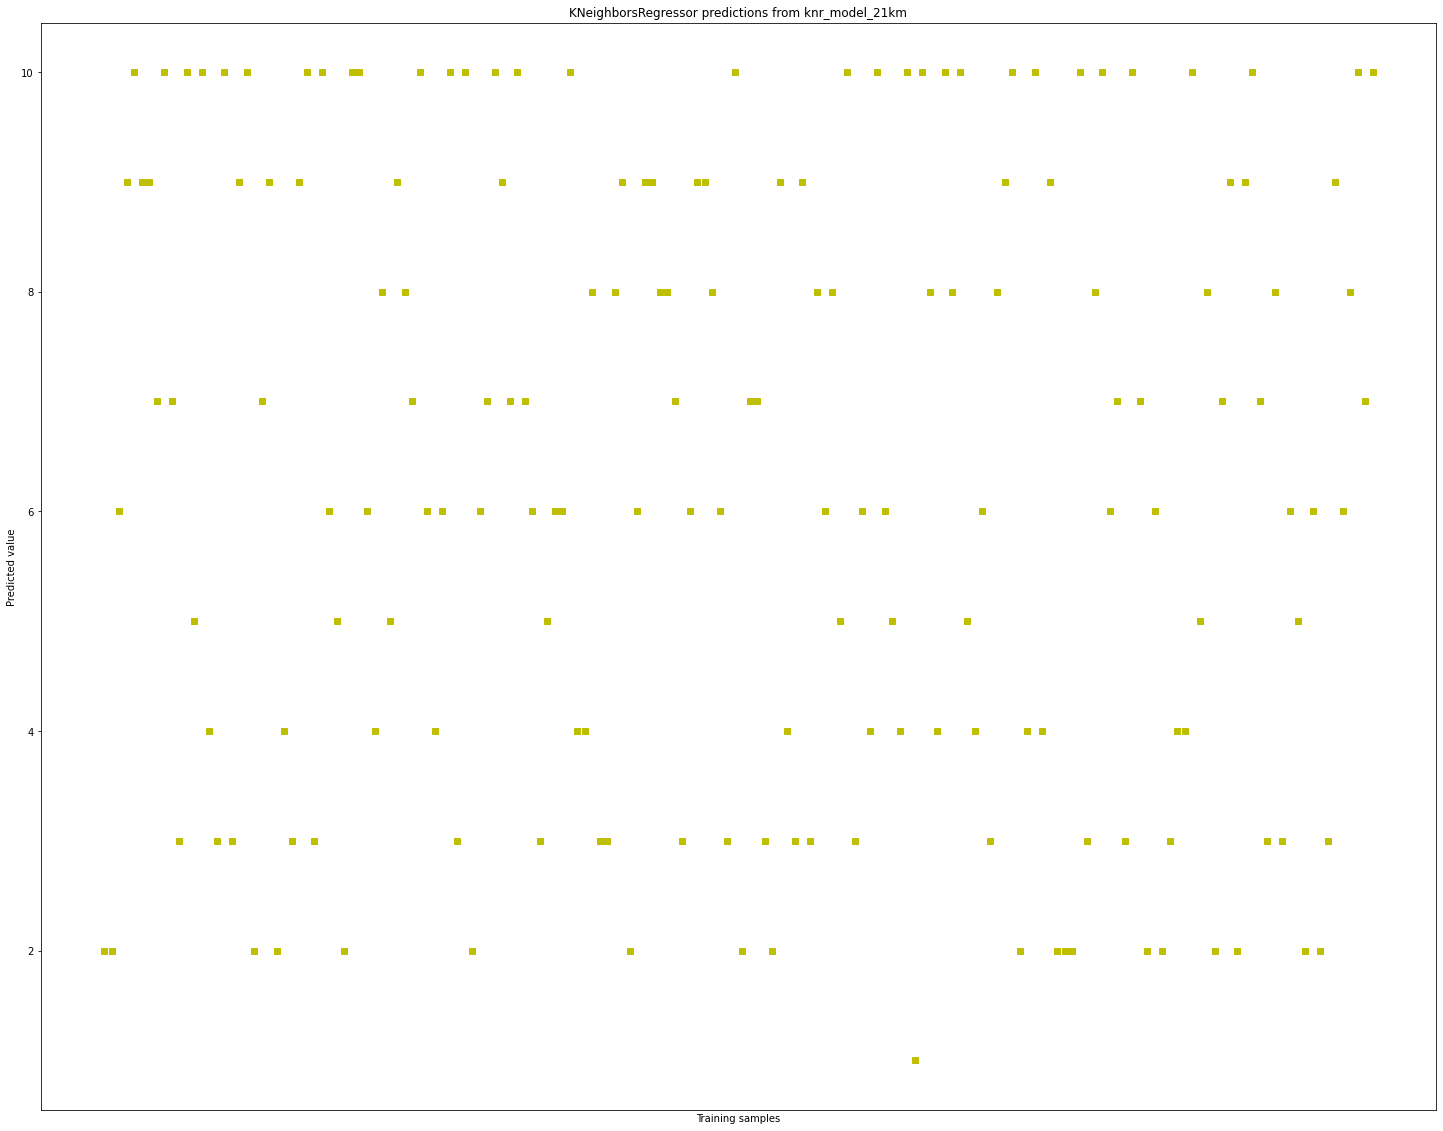

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

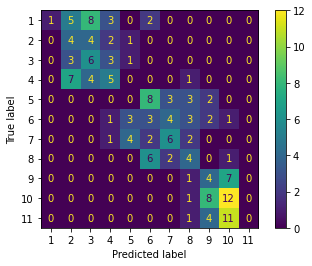

Saving knr_model_21km.joblib


<Figure size 432x288 with 0 Axes>

In [17]:
# Dataframe df_time_21km
# Training data with 21km time only
# Split data - Input (X) and Output (y)
# X - Input Data
# y - Output data
X_time_21km, y_time_21km = split_X_y_by_distance_column(df_time_21km, COLUMN_TIME_21KM_ID)

# DecisionTreeClassifier
dt_model_21km_dict = decision_tree_fit_and_measure(X_time_21km, y_time_21km)

# LinearRegression
lr_model_21km_dict = linear_reg_fit_and_measure(X_time_21km, y_time_21km)

# KNeighborsRegressor
knr_model_21km_dict = k_neigh_reg_fit_and_measure(X_time_21km, y_time_21km)

# Visualisation df_time_21km models
visualise_dt_model_by_dict(dt_model_21km_dict, 'dtm_model_21km')
visualise_lr_model_by_dict(lr_model_21km_dict, 'lr_model_21km')
visualise_knr_model_by_dict(knr_model_21km_dict, 'knr_model_21km')

DecisionTreeClassifier dtm_model_42km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.2057142857142857

Tree depth:
18

Tree number of leaves:
609

Visualisation dtm_model_42km
-------------------------------------------------------------------------------
DecisionTreeClassifier plot tree


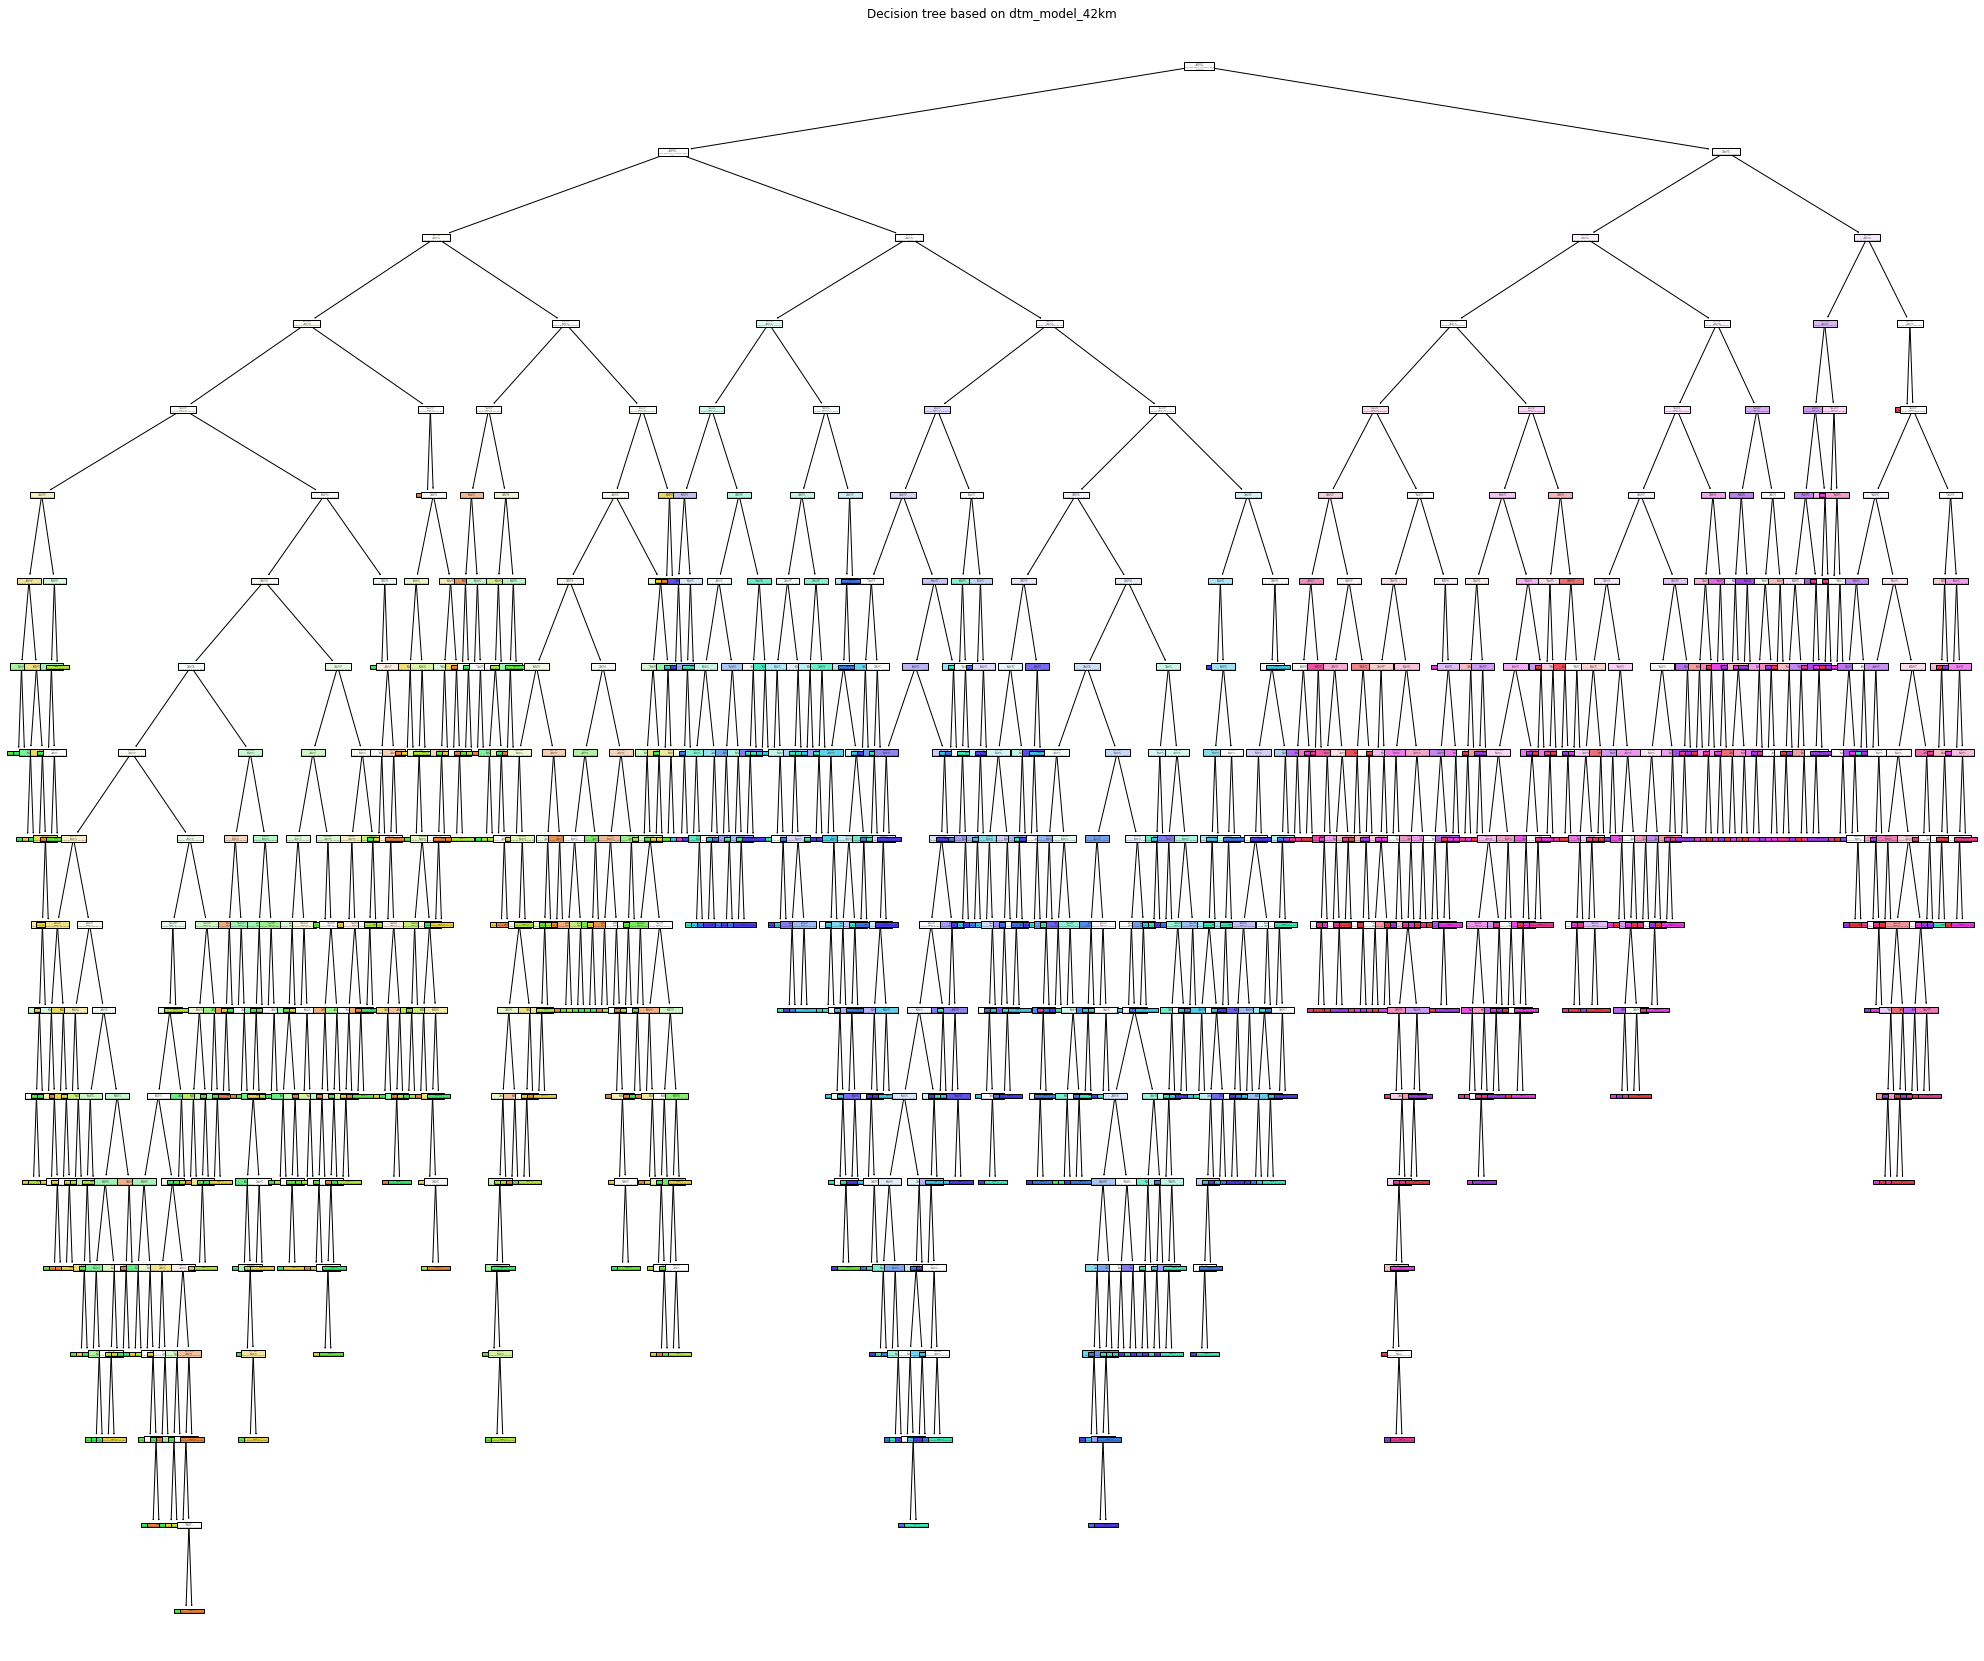

DecisionTreeClassifier confusion_matrix


<Figure size 432x288 with 0 Axes>

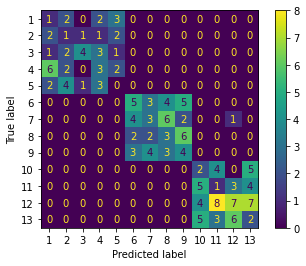

DecisionTreeClassifier Total impurity of leaves vs effective alphas


<Figure size 432x288 with 0 Axes>

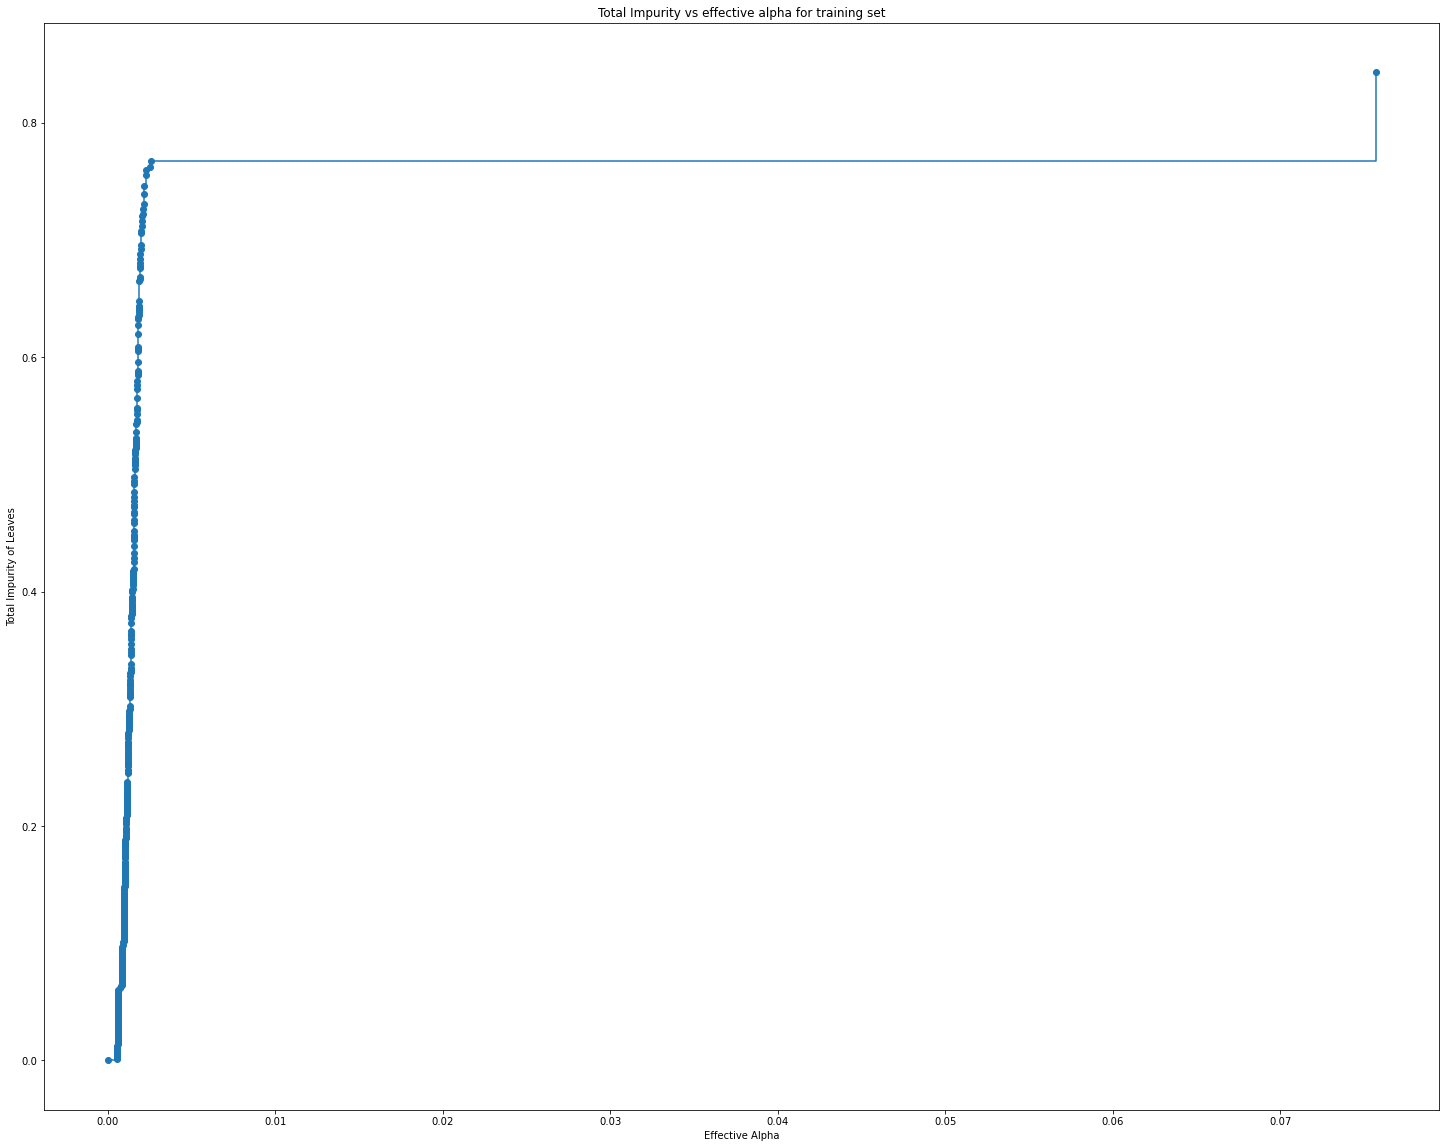

Saving dtm_model_42km.joblib
LinearRegression lr_model_42km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.8655519468991533

Visualisation lr_model_42km
-------------------------------------------------------------------------------
LinearRegression predictions plot


<Figure size 432x288 with 0 Axes>

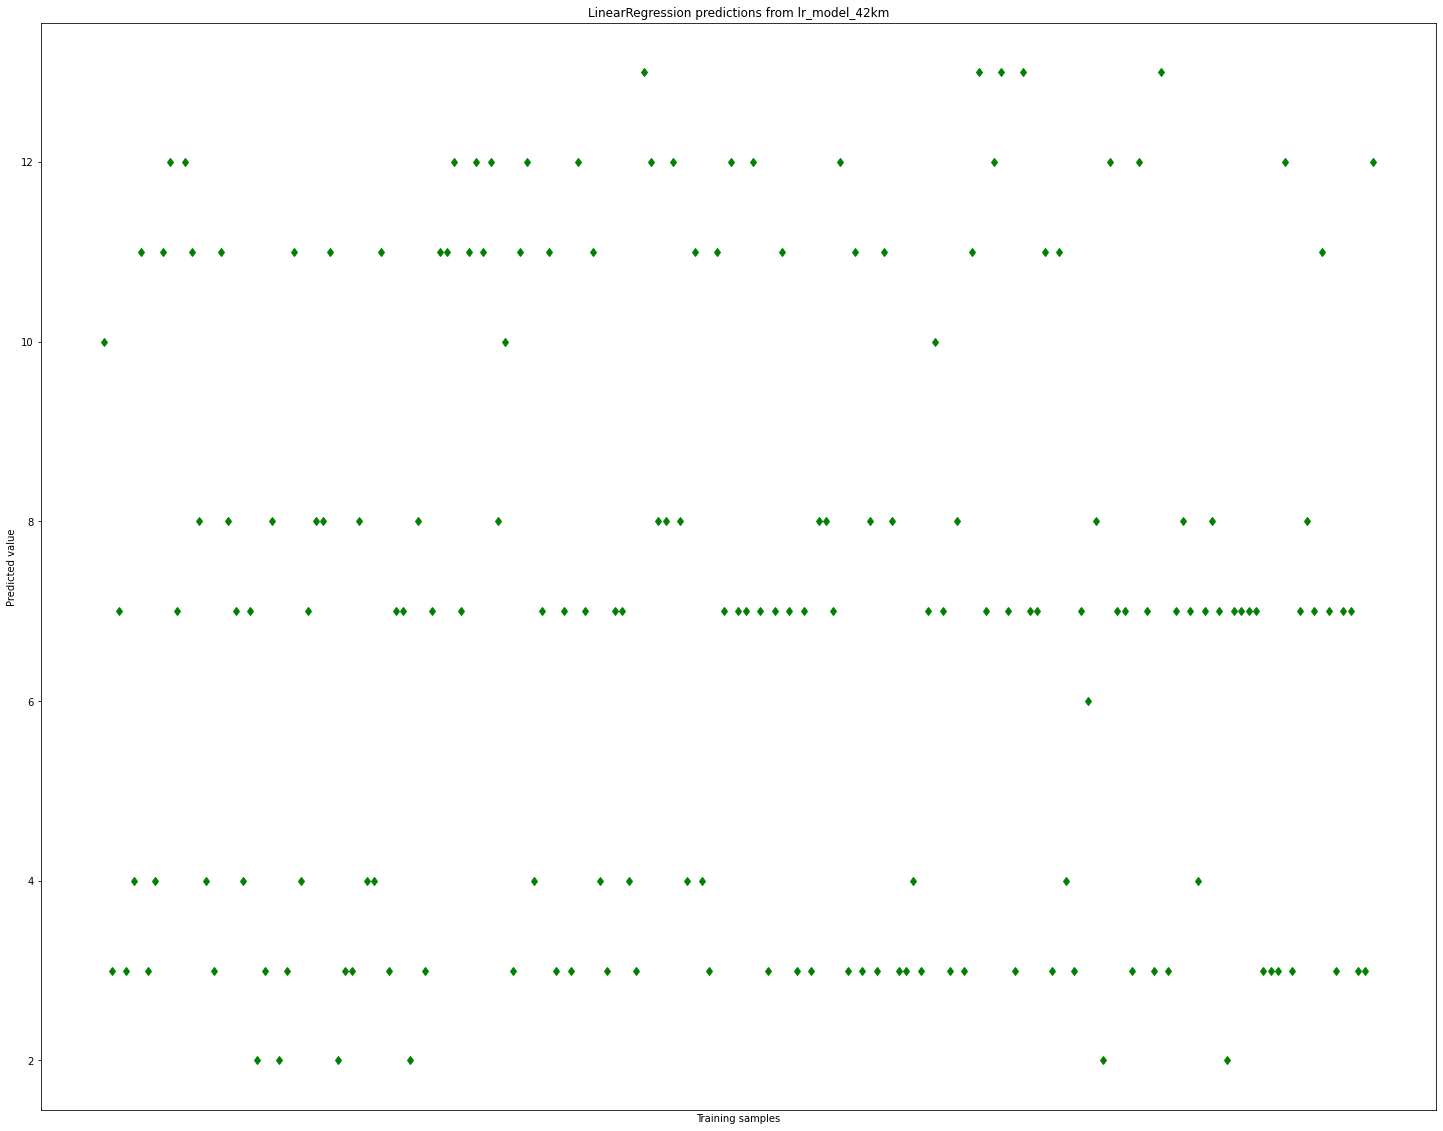

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

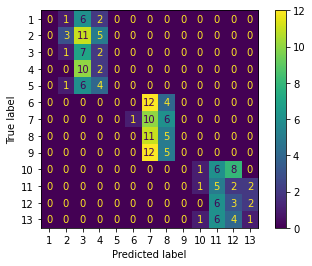

Saving lr_model_42km.joblib
KNeighborsRegressor knr_model_42km
-------------------------------------------------------------------------------
Model summary
-------------------------------------------------------------------------------
Model score:
0.8073742279901991

Visualisation knr_model_42km
-------------------------------------------------------------------------------
KNeighborsRegressor predictions plot


<Figure size 432x288 with 0 Axes>

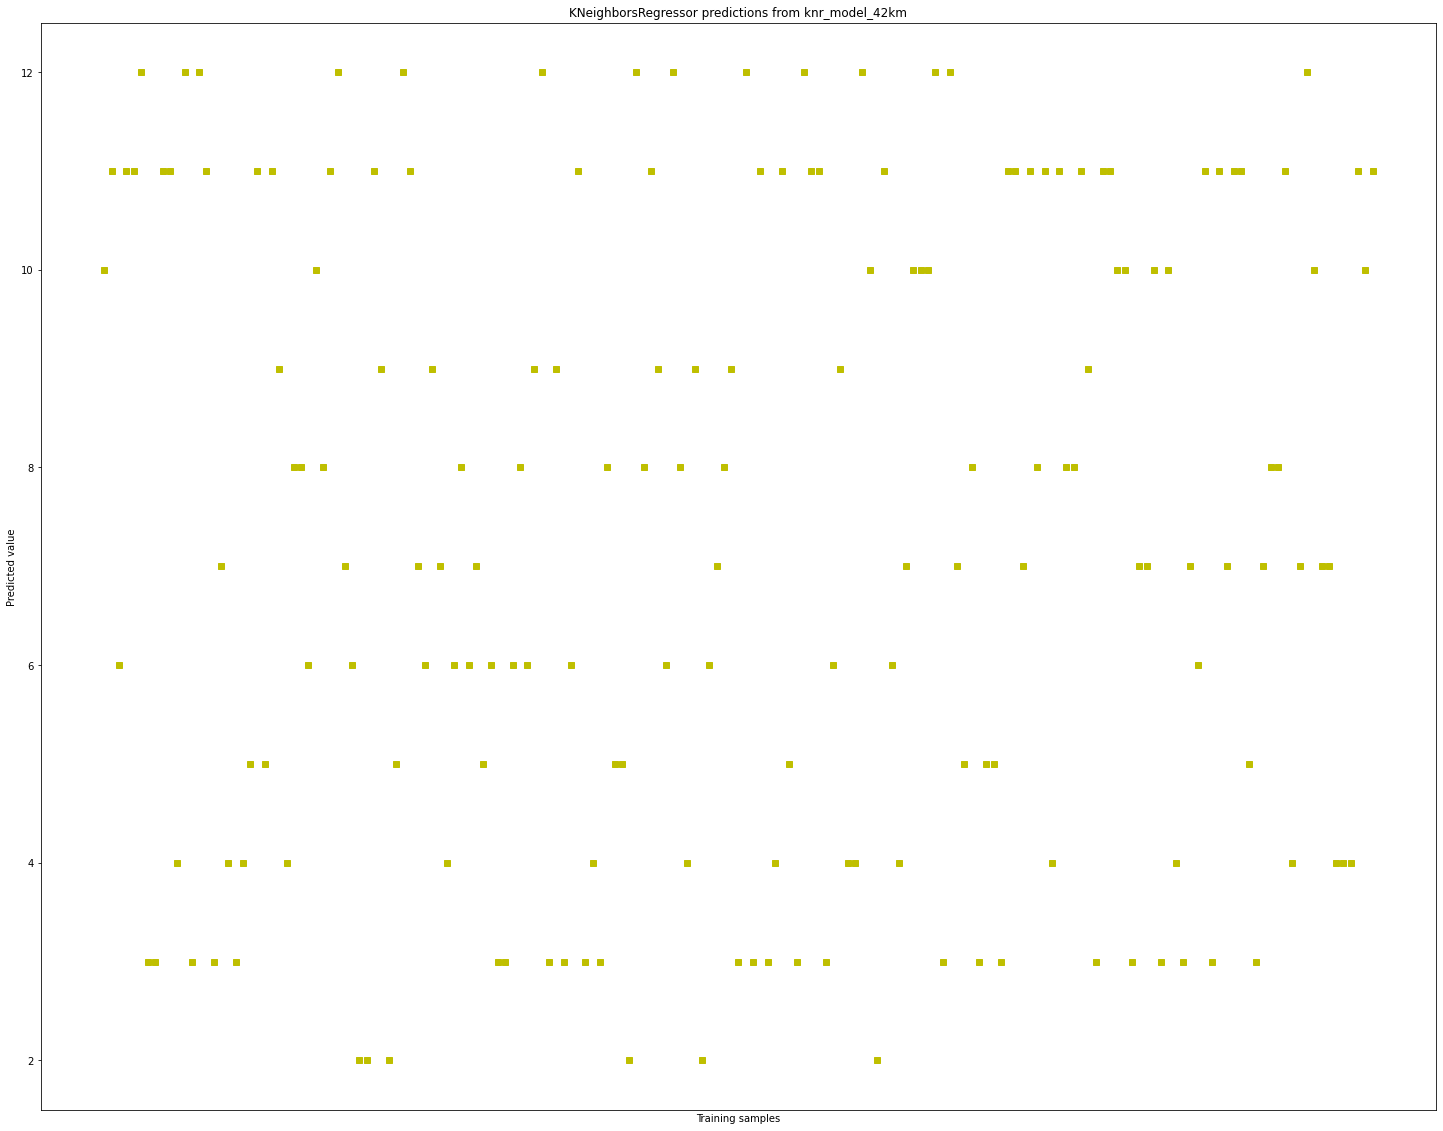

LinearRegression confusion_matrix


<Figure size 432x288 with 0 Axes>

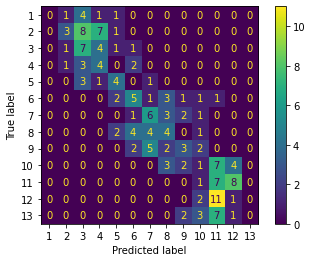

Saving knr_model_42km.joblib


<Figure size 432x288 with 0 Axes>

In [18]:
# Dataframe df_time_42km
# Training data with 42km time only
# Split data - Input (X) and Output (y)
# X - Input Data
# y - Output data
X_time_42km, y_time_42km = split_X_y_by_distance_column(df_time_42km, COLUMN_TIME_42KM_ID)

# DecisionTreeClassifier
dt_model_42km_dict = decision_tree_fit_and_measure(X_time_42km, y_time_42km)

# LinearRegression
lr_model_42km_dict = linear_reg_fit_and_measure(X_time_42km, y_time_42km)

# KNeighborsRegressor
knr_model_42km_dict = k_neigh_reg_fit_and_measure(X_time_42km, y_time_42km)

# Visualisation df_time_42km models
visualise_dt_model_by_dict(dt_model_42km_dict, 'dtm_model_42km')
visualise_lr_model_by_dict(lr_model_42km_dict, 'lr_model_42km')
visualise_knr_model_by_dict(knr_model_42km_dict, 'knr_model_42km')